In [2]:
!pip install torchviz

In [3]:
!pip install torch-summary
!pip install yfinance

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 949.2/949.2 kB 10.7 MB/s eta 0:00:00a 0:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 123.4/123.4 kB 17.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 30.6 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 173.3/173.3 kB 17.2 MB/s eta 0:00:00
  Created wheel for multitasking: filename=multitasking-0.0.12-py3-none-any.whl size=15549 sha256=04ea151c3bbaf56918581f75a44035010c4628d37c549fac807b7112b3512e02
  Stored in directory: /Users/nguyendackien/Library/Caches/pip/wheels/cc/bd/6f/664d62c99327abeef7d86489e6631cbf45b56fbf7ef1d6ef00
  Created wheel for peewee: filename=peewee-3.18.2-cp312-cp312-macosx_11_0_arm64.whl size=267677 sha256=f71dc3d9ea0aeaa8450e1e0473d80350426c580053191dec96e53cadcffb9d0f
  Stored in directory: /

In [5]:
!pip install keras

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 14.8 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.8/135.8 kB 14.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 663.9/663.9 kB 14.4 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 351.1/351.1 kB 21.5 MB/s eta 0:00:00


In [7]:
!pip install tensorflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.5/200.5 MB 14.9 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 24.8 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.8/25.8 MB 28.5 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.9/71.9 kB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 427.5/427.5 kB 28.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 31.2 MB/s eta 0:00:00a 0:00:01
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.20.3
    Uninstalling protobuf-3.20.3:
      Successfully uninstalled protobuf-3.20.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
streamlit 1.32.0 requires protobuf<5,>=3.20, but you have protobuf 6.33

In [10]:
import numpy as np
import pandas as pd
import seaborn as sns
import yfinance as yf
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
from datetime import timedelta
from IPython.display import Image
import plotly.graph_objects as go

# Import sklearn before deep learning frameworks
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Import PyTorch related libraries
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F  # Correct import for torch functional
from torch.utils.data import TensorDataset, DataLoader

# Try to import visualization tools for PyTorch if needed
try:
    from torchviz import make_dot
    from torchsummary import summary
except ImportError:
    print("Some PyTorch visualization tools couldn't be imported")

# Import TensorFlow and Keras in a separate cell or with proper environment setup
# If you need both frameworks, consider running them in separate notebook sessions
# or use this workaround:
import os
os.environ['PROTOCOL_BUFFERS_PYTHON_IMPLEMENTATION'] = 'python'

# Now try importing TensorFlow
try:
    import tensorflow as tf
    from tensorflow.keras.utils import plot_model
    from tensorflow.keras.models import Sequential
    from tensorflow.keras.layers import Embedding, SpatialDropout1D, Bidirectional, LSTM, Dense, Dropout
except Exception as e:
    print(f"TensorFlow import error: {e}")
    print("Consider using either PyTorch or TensorFlow, but not both in the same notebook")


TensorFlow import error: module 'google.protobuf.internal.api_implementation' has no attribute '_c_module'
Consider using either PyTorch or TensorFlow, but not both in the same notebook


In [16]:
tck = yf.Ticker("GOOG")
# defining the start date 
start_date = "2015-10-22"
# historical data
df = tck.history(start=start_date, end=None)
df

Open        High         Low       Close  \
Date                                                                        
2015-10-22 00:00:00-04:00   32.115225   32.666453   31.981640   32.367996   
2015-10-23 00:00:00-04:00   36.127771   36.251921   34.836607   34.861435   
2015-10-26 00:00:00-04:00   34.839086   35.713106   34.824685   35.396770   
2015-10-27 00:00:00-04:00   35.128608   35.438488   34.988071   35.183731   
2015-10-28 00:00:00-04:00   35.126124   35.406701   34.915067   35.405212   
...                               ...         ...         ...         ...   
2025-10-16 00:00:00-04:00  252.464996  257.579987  250.669998  251.880005   
2025-10-17 00:00:00-04:00  251.350006  254.880005  248.589996  253.789993   
2025-10-20 00:00:00-04:00  255.229996  257.880005  254.600006  257.019989   
2025-10-21 00:00:00-04:00  255.250000  255.380005  244.669998  251.339996   
2025-10-22 00:00:00-04:00  255.039993  257.179993  250.451004  252.529999   

                              Volume  Dividends  Stock Splits  
Date                                                           
2015-10-22 00:00:00-04:00   81420000        0.0           0.0  
2015-10-23 00:00:00-04:00  133078000        0.0           0.0  
2015-10-26 00:00:00-04:00   54332000        0.0           0.0  
2015-10-27 00:00:00-04:00   44916000        0.0           0.0  
2015-10-28 00:00:00-04:00   43578000        0.0           0.0  
...                              ...        ...           ...  
2025-10-16 00:00:00-04:00   18946000        0.0           0.0  
2025-10-17 00:00:00-04:00   17653800        0.0           0.0  
2025-10-20 00:00:00-04:00   13726800        0.0           0.0  
2025-10-21 00:00:00-04:00   27836400        0.0           0.0  
2025-10-22 00:00:00-04:00   19365012        0.0           0.0  

[2515 rows x 7 columns]

In [17]:
# Move column 'Close' to the second position
col_close = df.pop('Close')
df.insert(1, 'Close', col_close)
df.head()

Open      Close       High        Low  \
Date                                                                    
2015-10-22 00:00:00-04:00  32.115225  32.367996  32.666453  31.981640   
2015-10-23 00:00:00-04:00  36.127771  34.861435  36.251921  34.836607   
2015-10-26 00:00:00-04:00  34.839086  35.396770  35.713106  34.824685   
2015-10-27 00:00:00-04:00  35.128608  35.183731  35.438488  34.988071   
2015-10-28 00:00:00-04:00  35.126124  35.405212  35.406701  34.915067   

                              Volume  Dividends  Stock Splits  
Date                                                           
2015-10-22 00:00:00-04:00   81420000        0.0           0.0  
2015-10-23 00:00:00-04:00  133078000        0.0           0.0  
2015-10-26 00:00:00-04:00   54332000        0.0           0.0  
2015-10-27 00:00:00-04:00   44916000        0.0           0.0  
2015-10-28 00:00:00-04:00   43578000        0.0           0.0

In [18]:
df.columns

Index(['Open', 'Close', 'High', 'Low', 'Volume', 'Dividends', 'Stock Splits'], dtype='object')

In [36]:
columns=['Open', 'High', 'Low', 'Close', 'Volume', 'Dividends', 'Stock Splits']

In [37]:
df.shape

(2515, 7)

There are 7 columns & 2082 rows in this dataset.

In [23]:
def check_df(df: object, head: object = 5) -> object:
    print("\nShape")
    print(df.shape)
    print("\nTypes")
    print(df.dtypes)
    print("\nNANs")
    print(df.isnull().sum())
    print("\nInfo")
    print(df.info())
check_df(df)


Shape
(2515, 7)

Types
Open            float64
Close           float64
High            float64
Low             float64
Volume            int64
Dividends       float64
Stock Splits    float64
dtype: object

NANs
Open            0
Close           0
High            0
Low             0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64

Info
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2515 entries, 2015-10-22 00:00:00-04:00 to 2025-10-22 00:00:00-04:00
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          2515 non-null   float64
 1   Close         2515 non-null   float64
 2   High          2515 non-null   float64
 3   Low           2515 non-null   float64
 4   Volume        2515 non-null   int64  
 5   Dividends     2515 non-null   float64
 6   Stock Splits  2515 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 157.2 KB
None


In [24]:
df['Volume'] = df['Volume'].astype('float64')

In [25]:
print('Number of duplicated rows: ' , len(df[df.duplicated()]))

Number of duplicated rows:  0


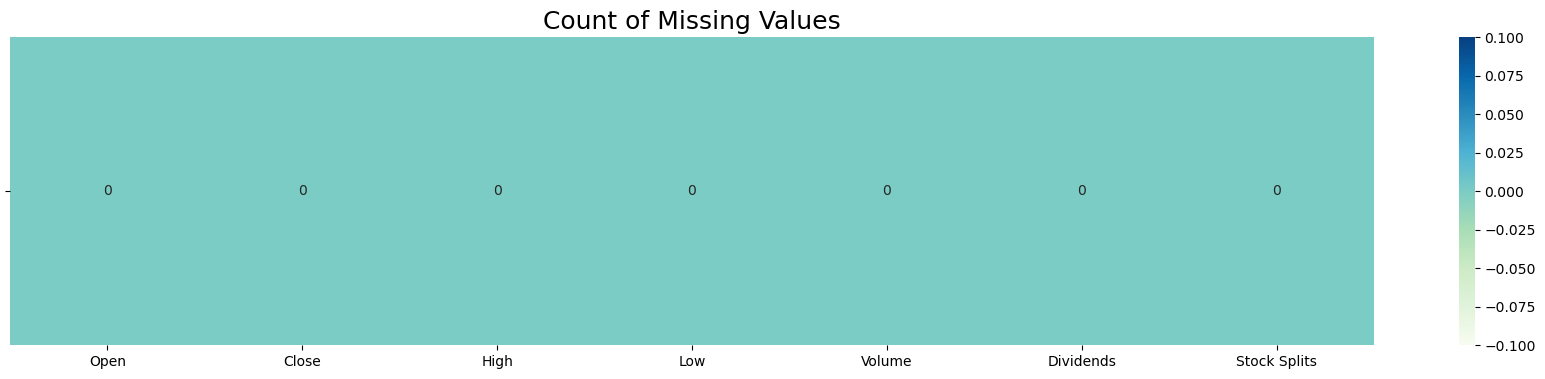

In [27]:

plt.figure(figsize=(22,4))
sns.heatmap((df.isna().sum()).to_frame(name='').T,cmap='GnBu', annot=True,
             fmt='0.0f').set_title('Count of Missing Values', fontsize=18)
plt.show()

There is no duplicated row & no NAN data. 

In [28]:
df.describe().T.style.background_gradient(cmap='GnBu', axis=1)

we can see statistical information on the table above.

In [29]:
df.apply(lambda x: len(x.unique()))

Open            2515
Close           2478
High            2515
Low             2515
Volume          2436
Dividends          3
Stock Splits       2
dtype: int64

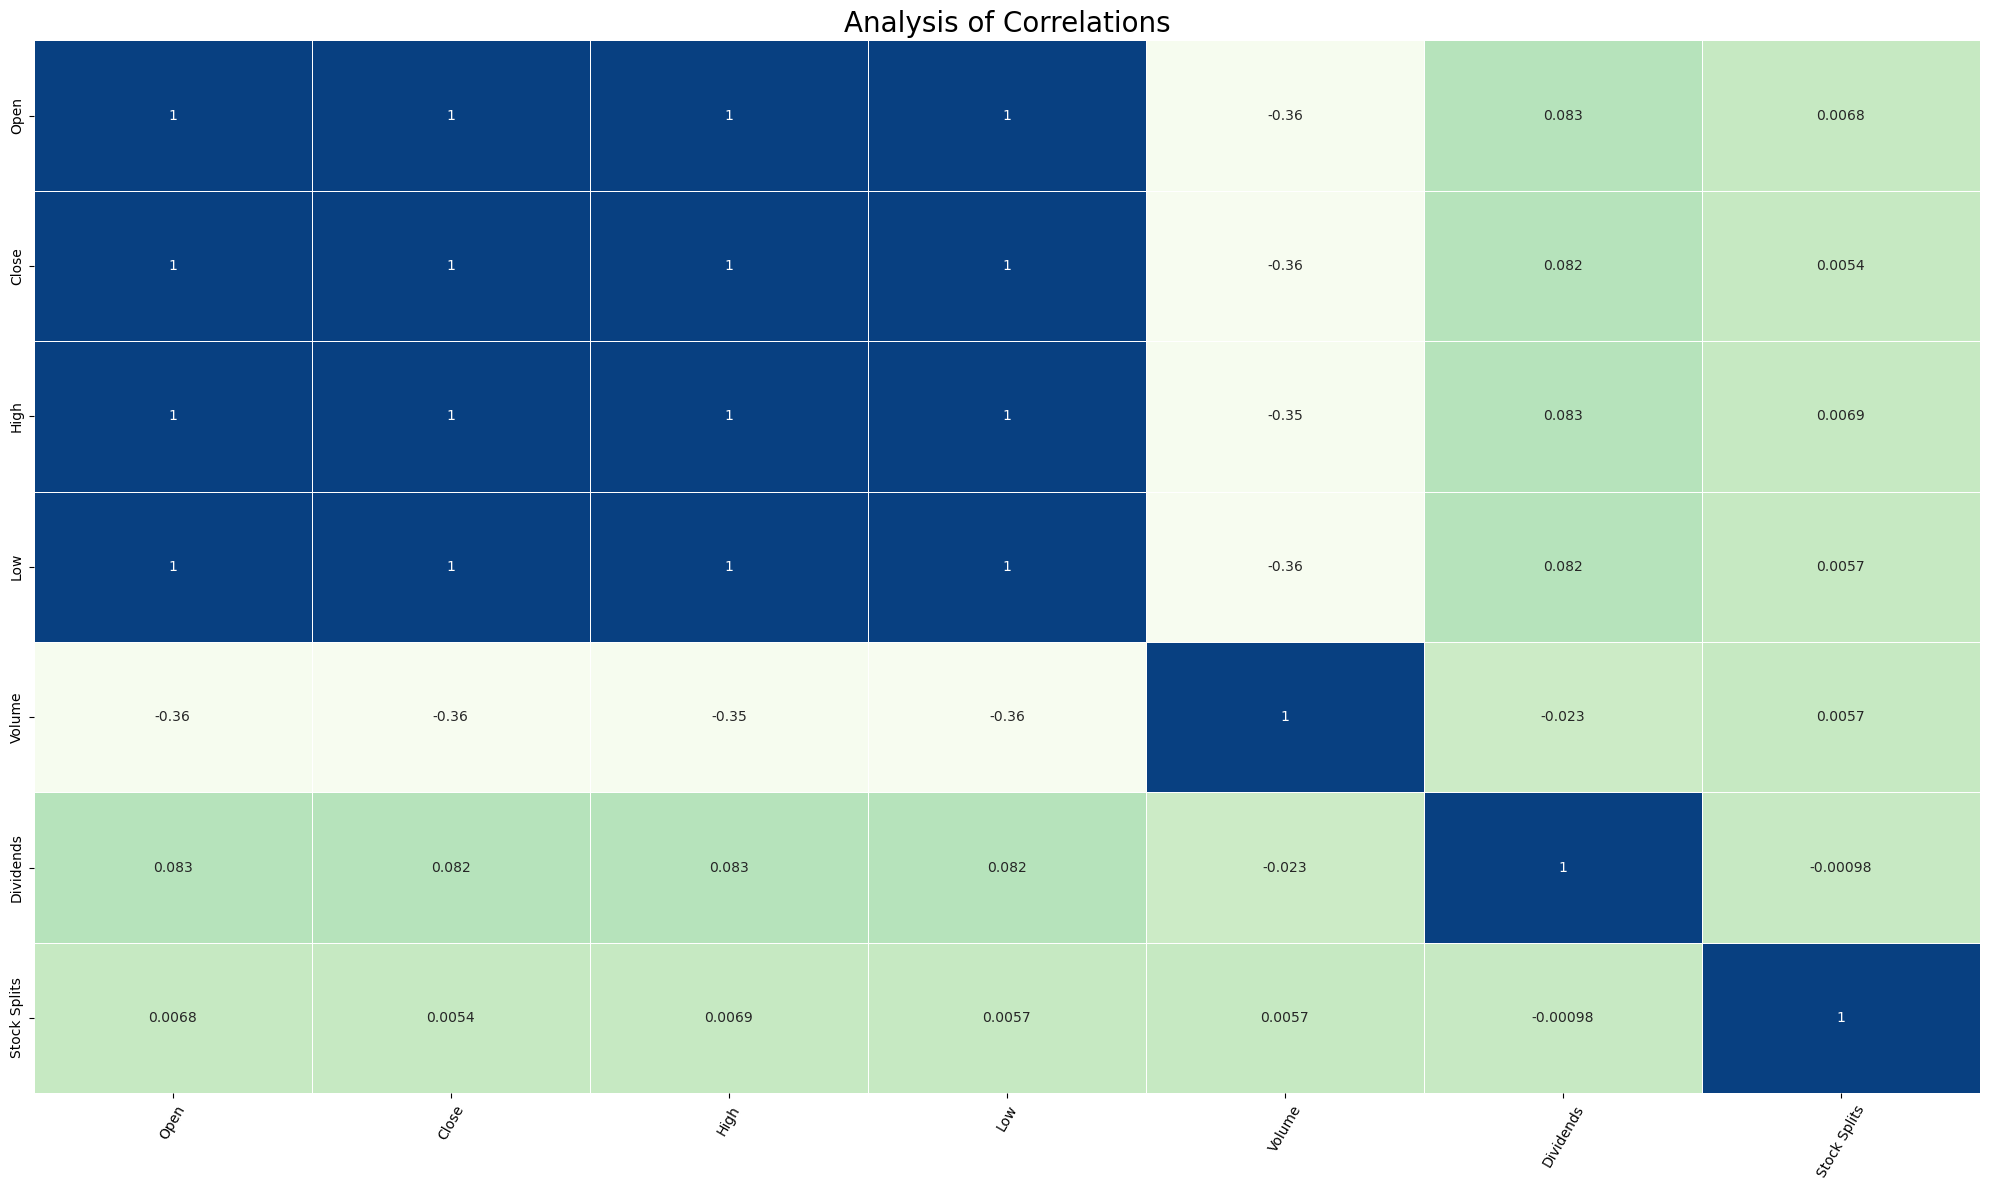

In [31]:
plt.figure(figsize=(20, 12))
sns.heatmap(df.corr(numeric_only=True), cmap="GnBu", annot=True, linewidths=.6 , cbar = False)
plt.xticks(rotation=60, size=10)
plt.yticks(size=10)
plt.title('Analysis of Correlations', size=20)
plt.tight_layout()
plt.show()

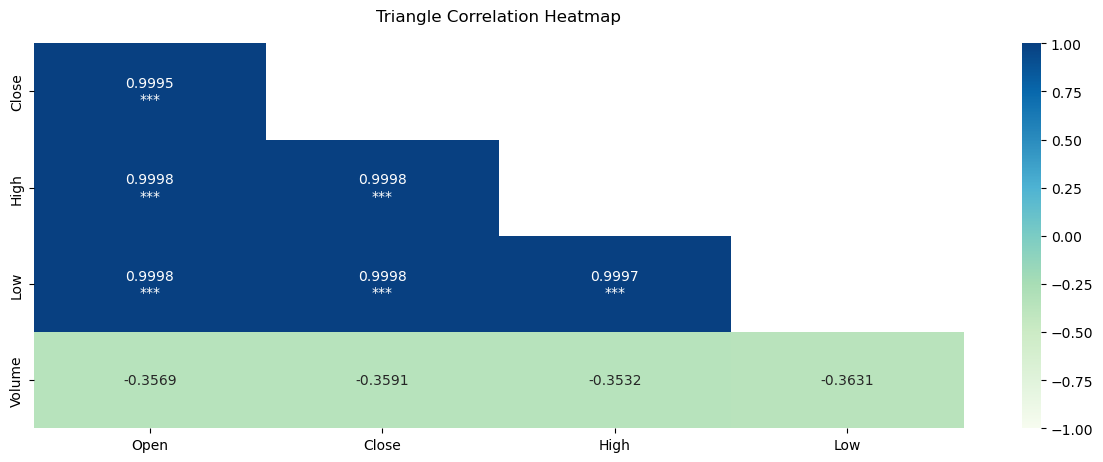

In [33]:

corr = df.corr(numeric_only=True)
f, ax = plt.subplots(figsize=(15, 5))
mask = np.triu(np.ones_like(corr, dtype=bool))
cut_off = 0.25
extreme_1 = 0.5
extreme_2 = 0.75
extreme_3 = 0.9
mask |= np.abs(corr) < cut_off
corr = corr[~mask]
remove_empty_rows_and_cols = True
if remove_empty_rows_and_cols:
    wanted_cols = np.flatnonzero(np.count_nonzero(~mask, axis=1))
    wanted_rows = np.flatnonzero(np.count_nonzero(~mask, axis=0))
    corr = corr.iloc[wanted_cols, wanted_rows]

annot = [[f"{val:.4f}"
          + ('' if abs(val) < extreme_1 else '\n*')
          + ('' if abs(val) < extreme_2 else '*')
          + ('' if abs(val) < extreme_3 else '*')
          for val in row] for row in corr.to_numpy()]
heatmap = sns.heatmap(corr, vmin=-1, vmax=1, annot=annot, fmt='', cmap='GnBu')
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize': 12}, pad=16)
plt.show()

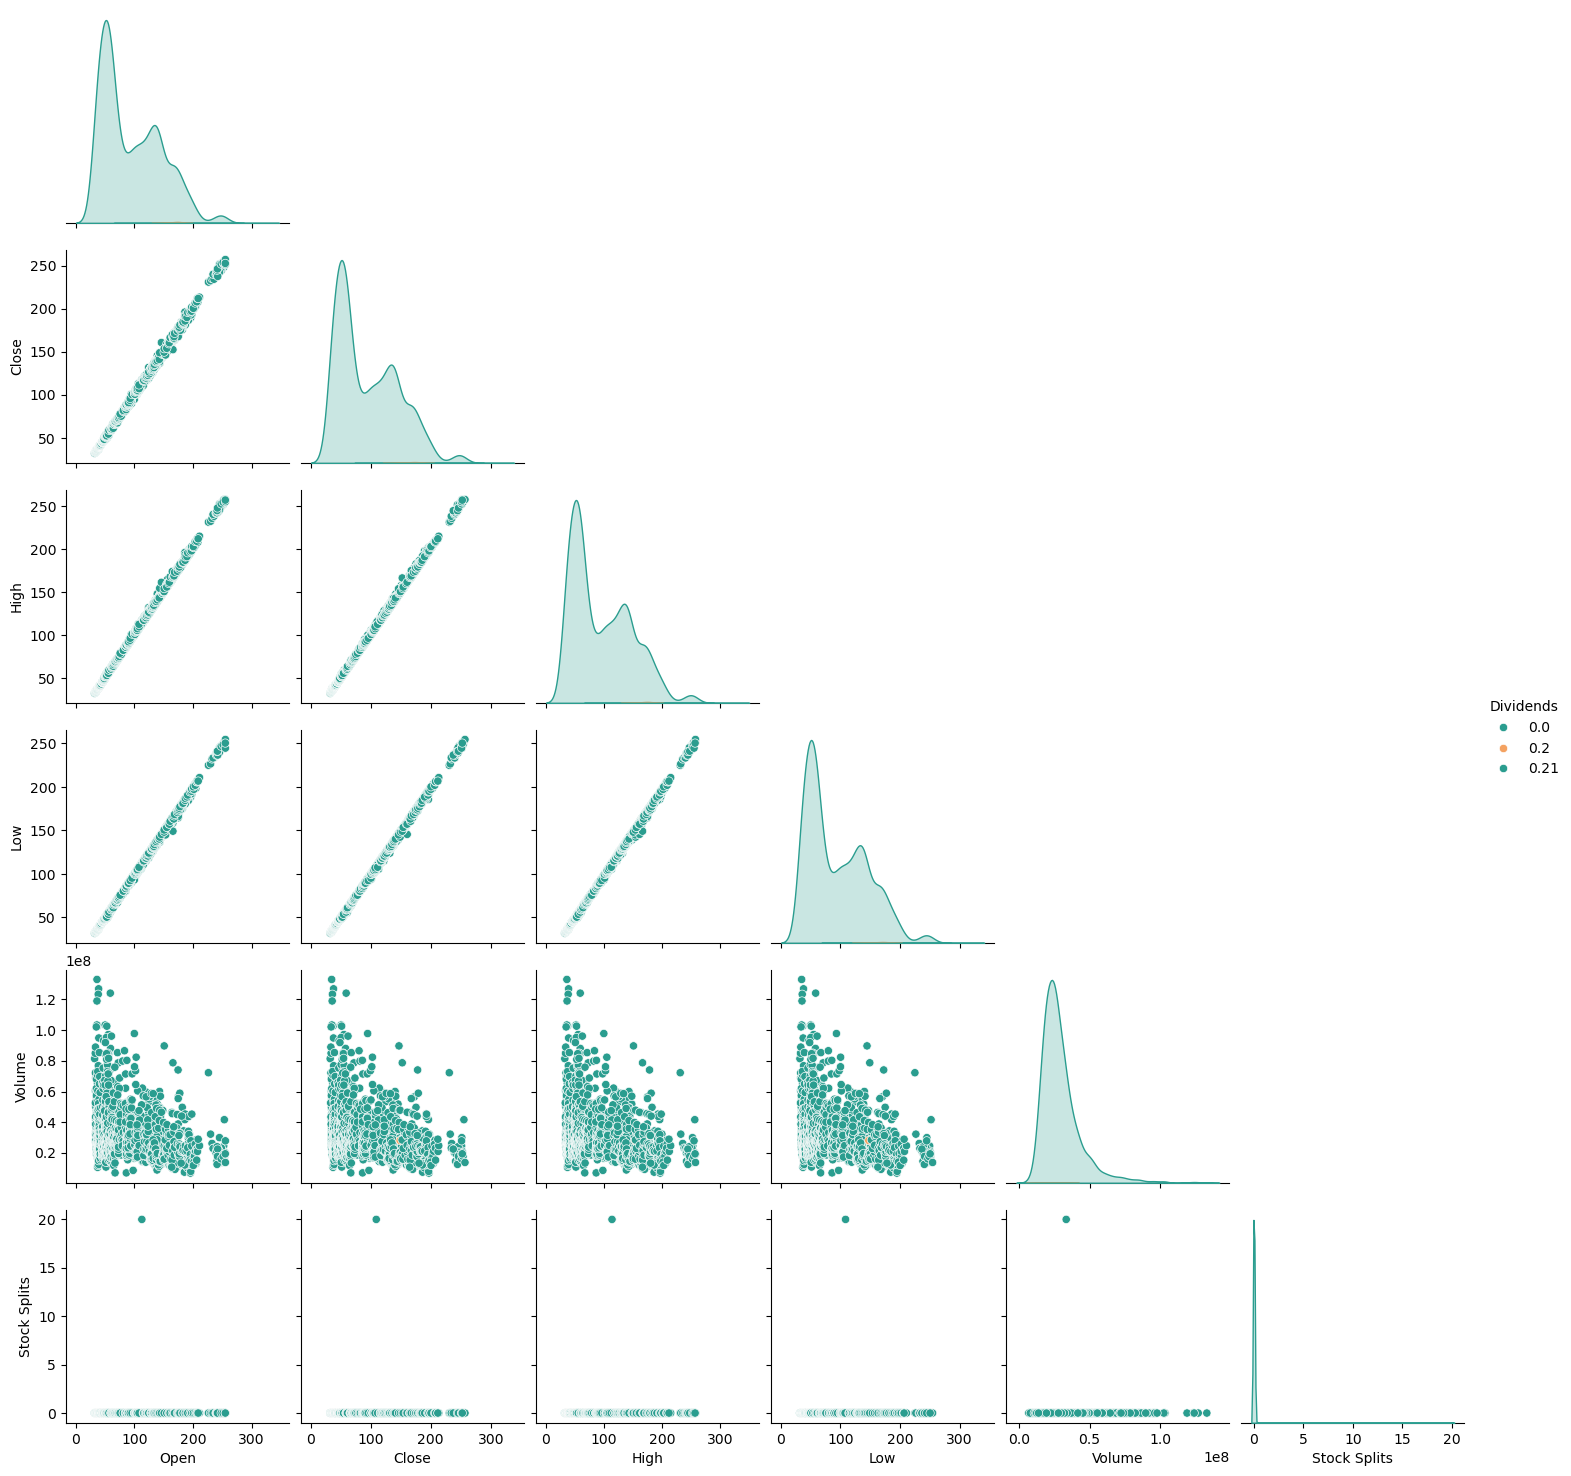

In [34]:
import warnings
warnings.filterwarnings('ignore')
custom_palette = sns.color_palette(['#2a9d8f', '#f4a261'])
sns.pairplot(data=df, diag_kind='kde', hue='Dividends', palette=custom_palette,corner=True)
plt.gcf().set_facecolor('#ffffff')
plt.show()

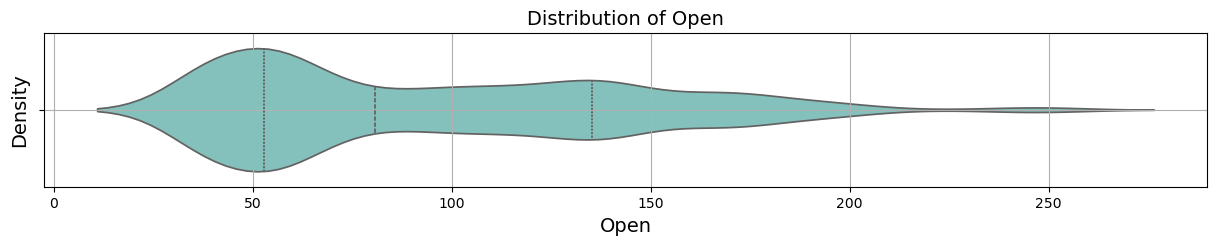

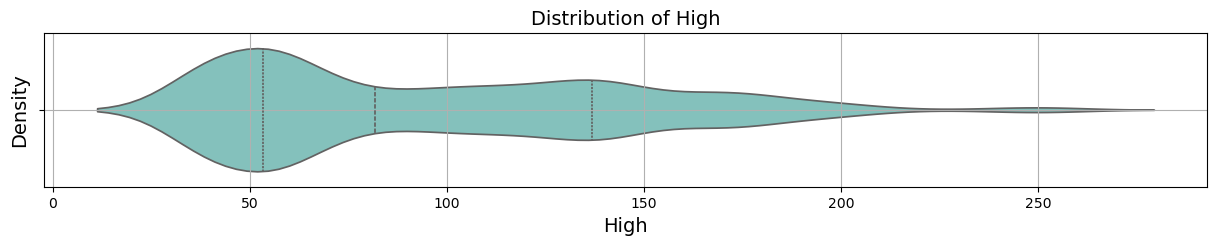

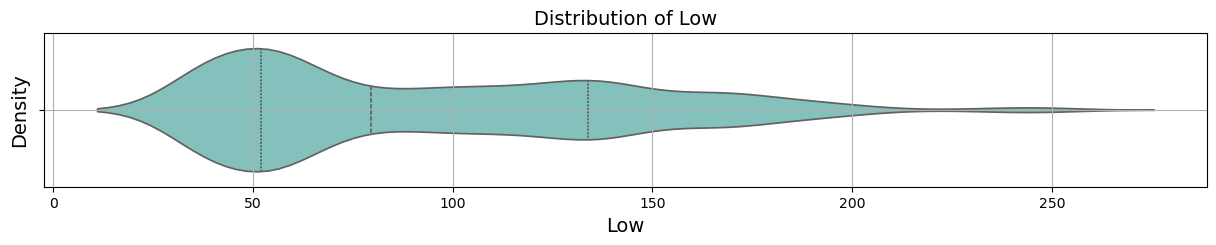

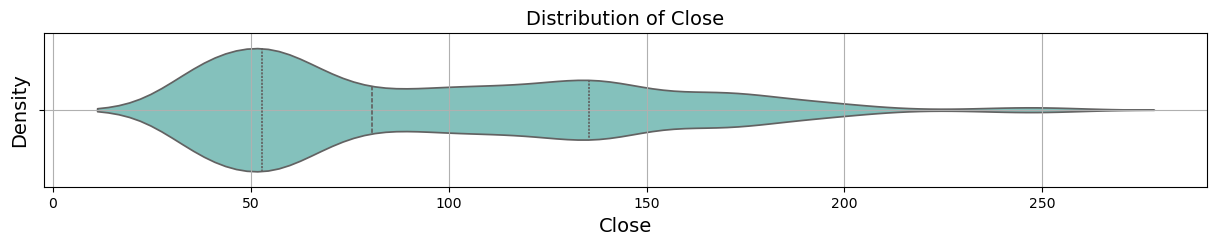

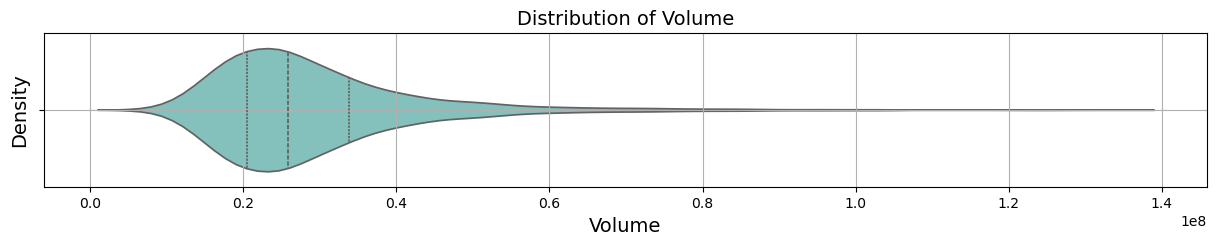

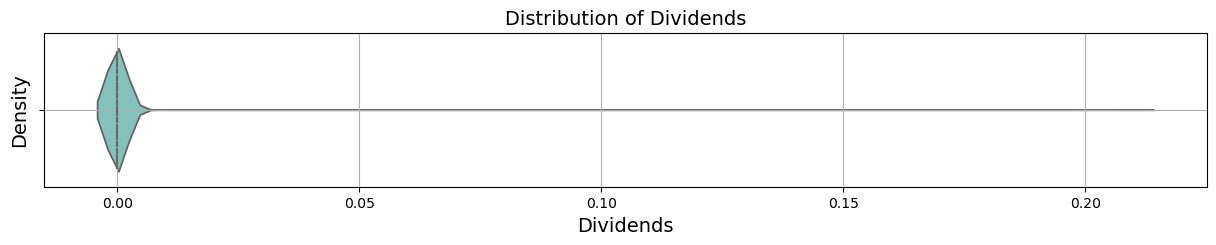

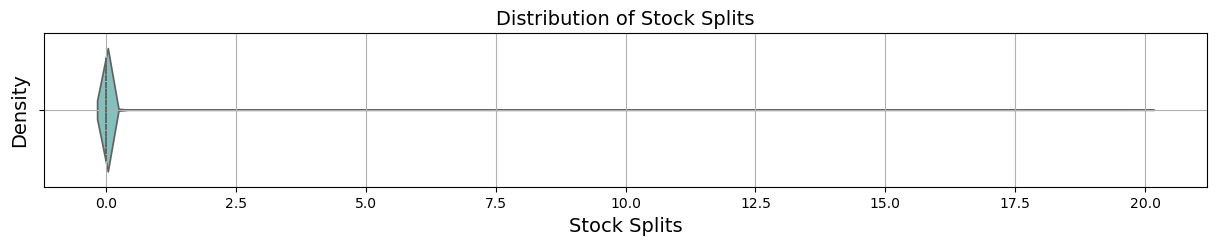

In [38]:
palette = "GnBu"
for column in columns:
    plt.figure(figsize=(15, 2)) 
    sns.violinplot(x=df[column], palette=palette, inner="quartile")  
    plt.title(f'Distribution of {column}', fontsize=14)
    plt.xlabel(column, fontsize=14)
    plt.ylabel('Density', fontsize=14)
    plt.grid(True)
    plt.show()

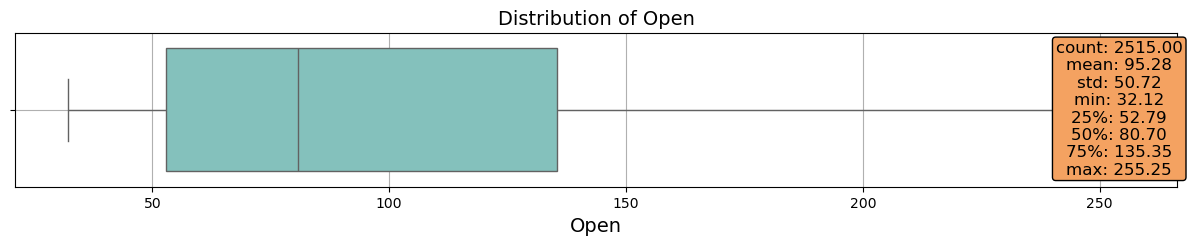

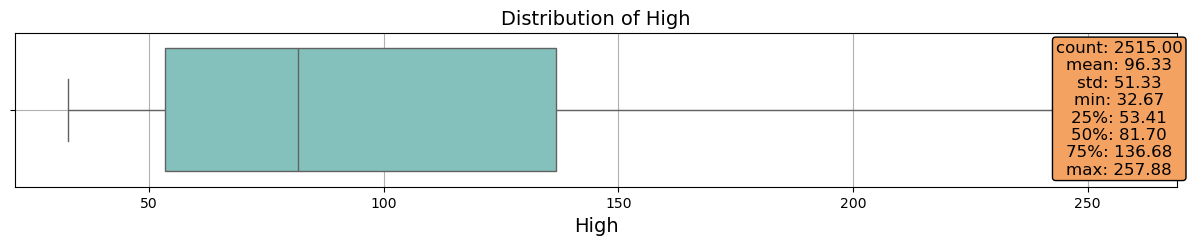

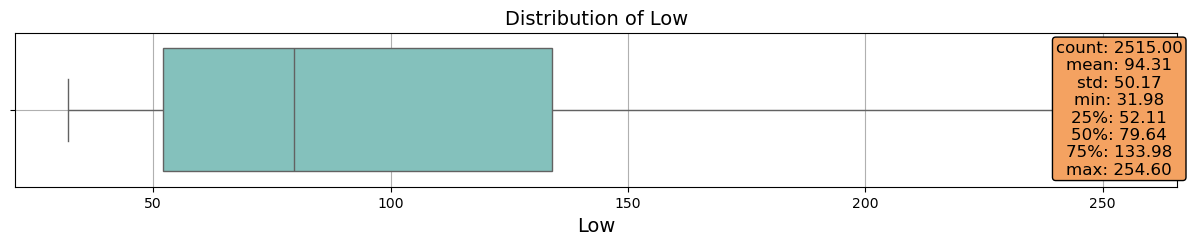

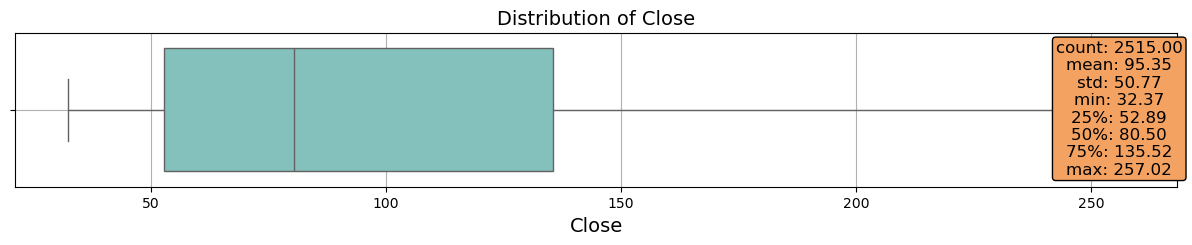

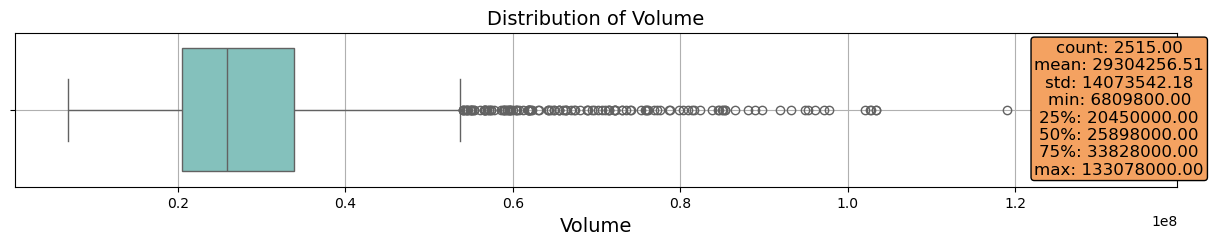

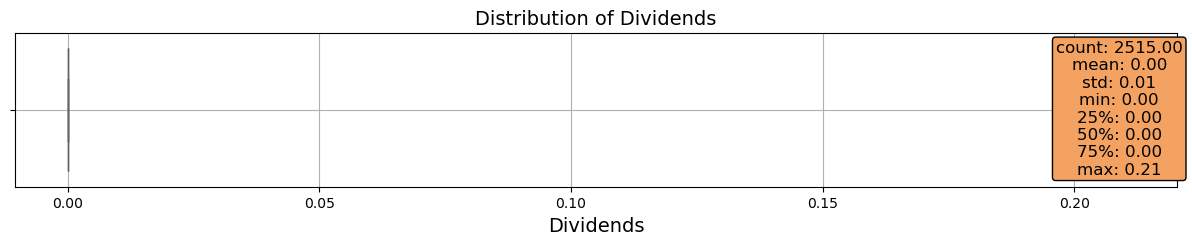

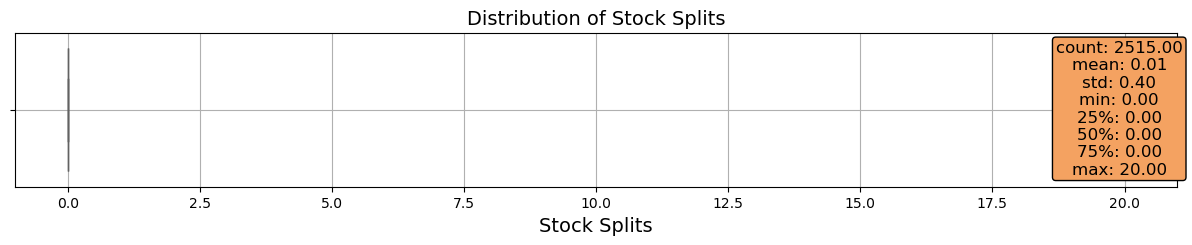

In [39]:
palette = "GnBu" 
for column in columns:
    plt.figure(figsize=(15, 2)) 
    sns.boxplot(x=df[column], palette=palette)
    plt.title(f'Distribution of {column}', fontsize=14)
    plt.xlabel(column, fontsize=14)
    stats = df[column].describe()
    stats_text = "\n".join([f"{key}: {value:.2f}" for key, value in stats.items()])
    plt.text(0.95, 0.95, stats_text, transform=plt.gca().transAxes, 
             fontsize=12, verticalalignment='top', 
             horizontalalignment='center', bbox=dict(boxstyle='round,pad=0.2', edgecolor='black', facecolor='#f4a261'))
    plt.grid(True) 
    plt.show()
    

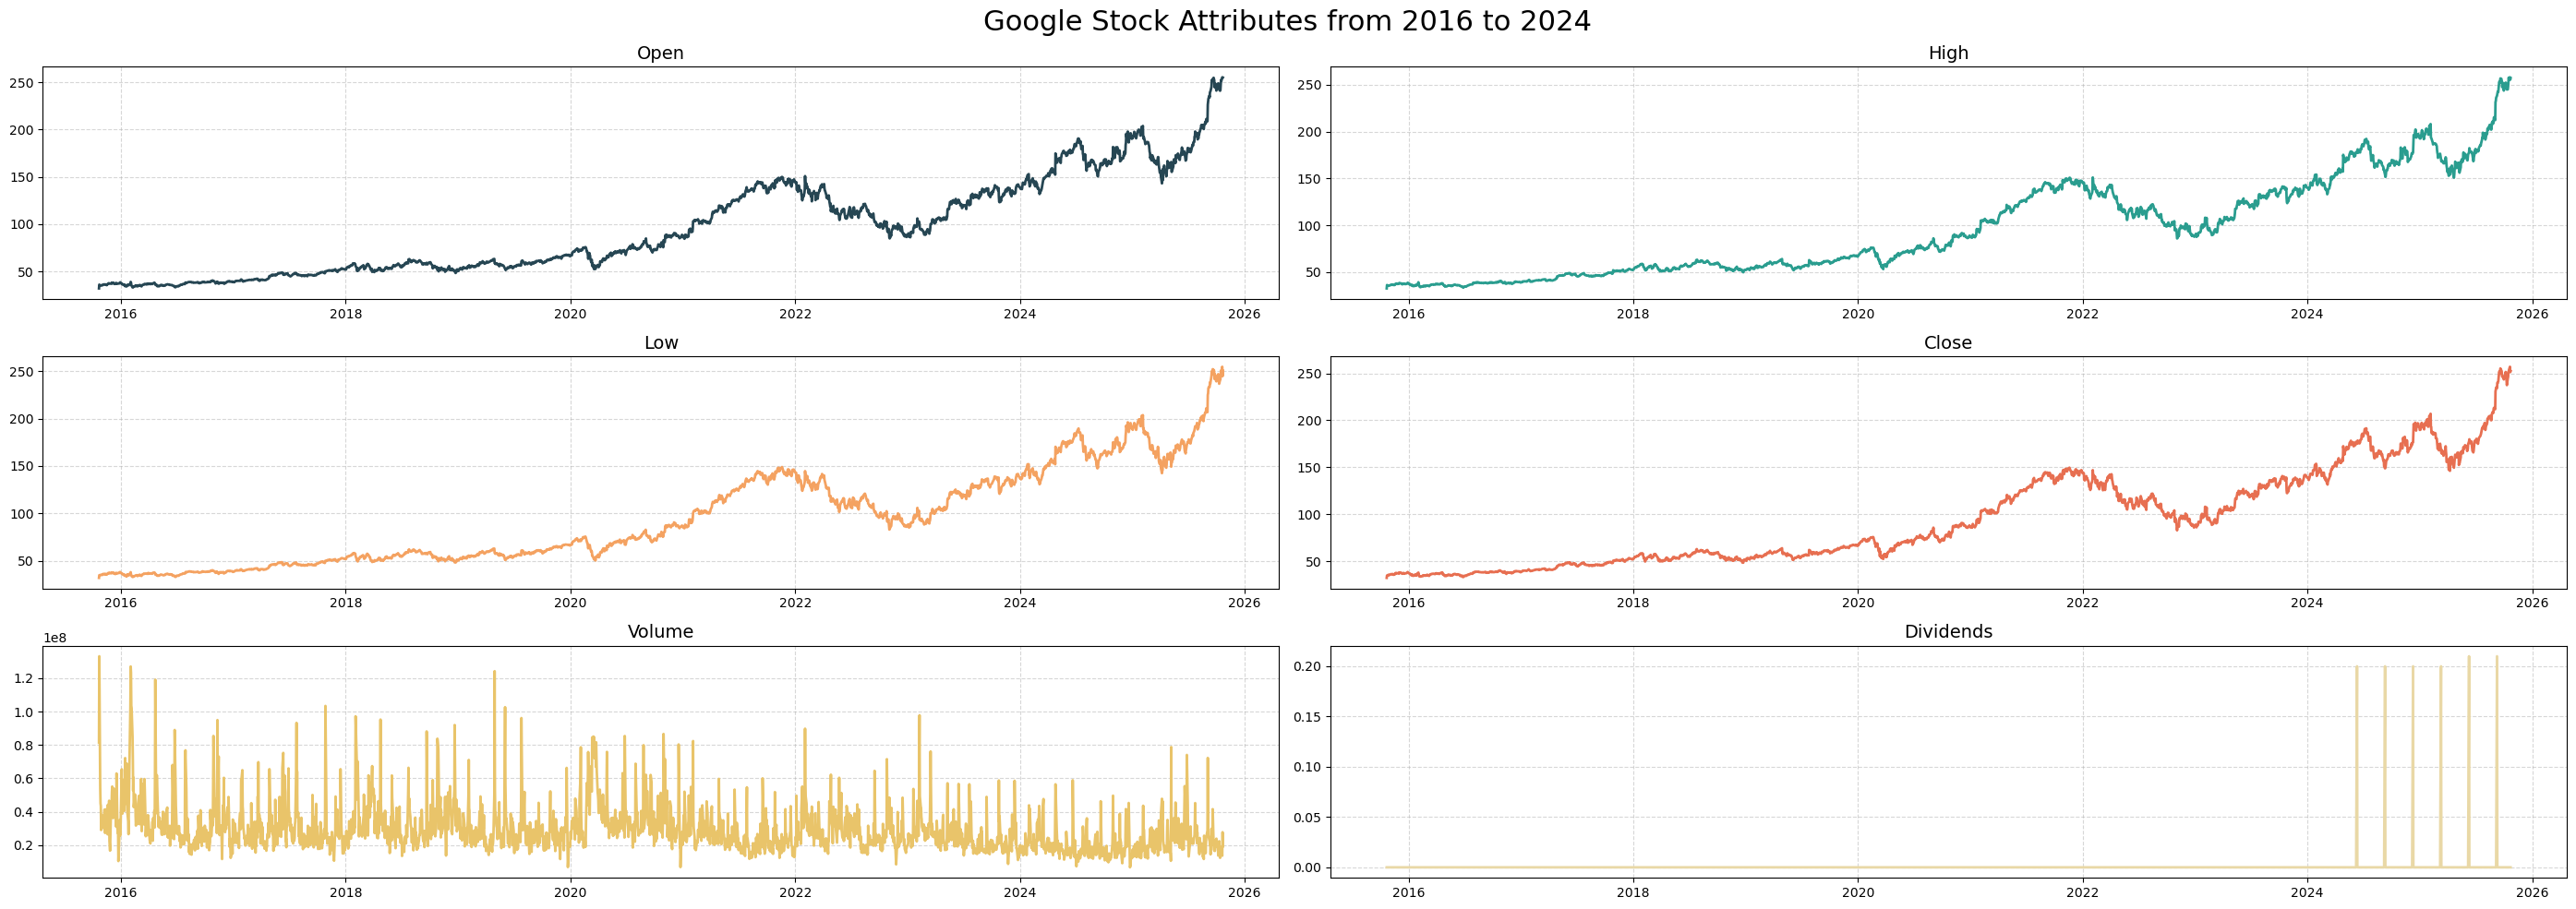

In [40]:
import matplotlib.pyplot as plt
x=df.index
colors = ['#264653', '#2a9d8f', '#f4a261', '#e76f51','#e9c46a', '#e9d8a6']
plt.figure(figsize=(28, 10))
plt.subplot(3, 2, 1)
plt.plot(x, df['Open'], color=colors[0], linewidth=2)
plt.title('Open', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.5)
plt.subplot(3, 2, 2)
plt.plot(x, df['High'], color=colors[1], linewidth=2)
plt.title('High', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.5)
plt.subplot(3, 2, 3)
plt.plot(x, df['Low'], color=colors[2], linewidth=2)
plt.title('Low', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.5)
plt.subplot(3, 2, 4)
plt.plot(x, df['Close'], color=colors[3], linewidth=2)
plt.title('Close', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.5)
plt.subplot(3, 2, 5)
plt.plot(x, df['Volume'], color=colors[4], linewidth=2)
plt.title('Volume', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.5)
plt.subplot(3, 2, 6)
plt.plot(x, df['Dividends'], color=colors[5], linewidth=2)
plt.title('Dividends', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.5)
plt.suptitle('Google Stock Attributes from 2016 to 2024', fontsize=22, y=0.98)
plt.tight_layout()
plt.show()

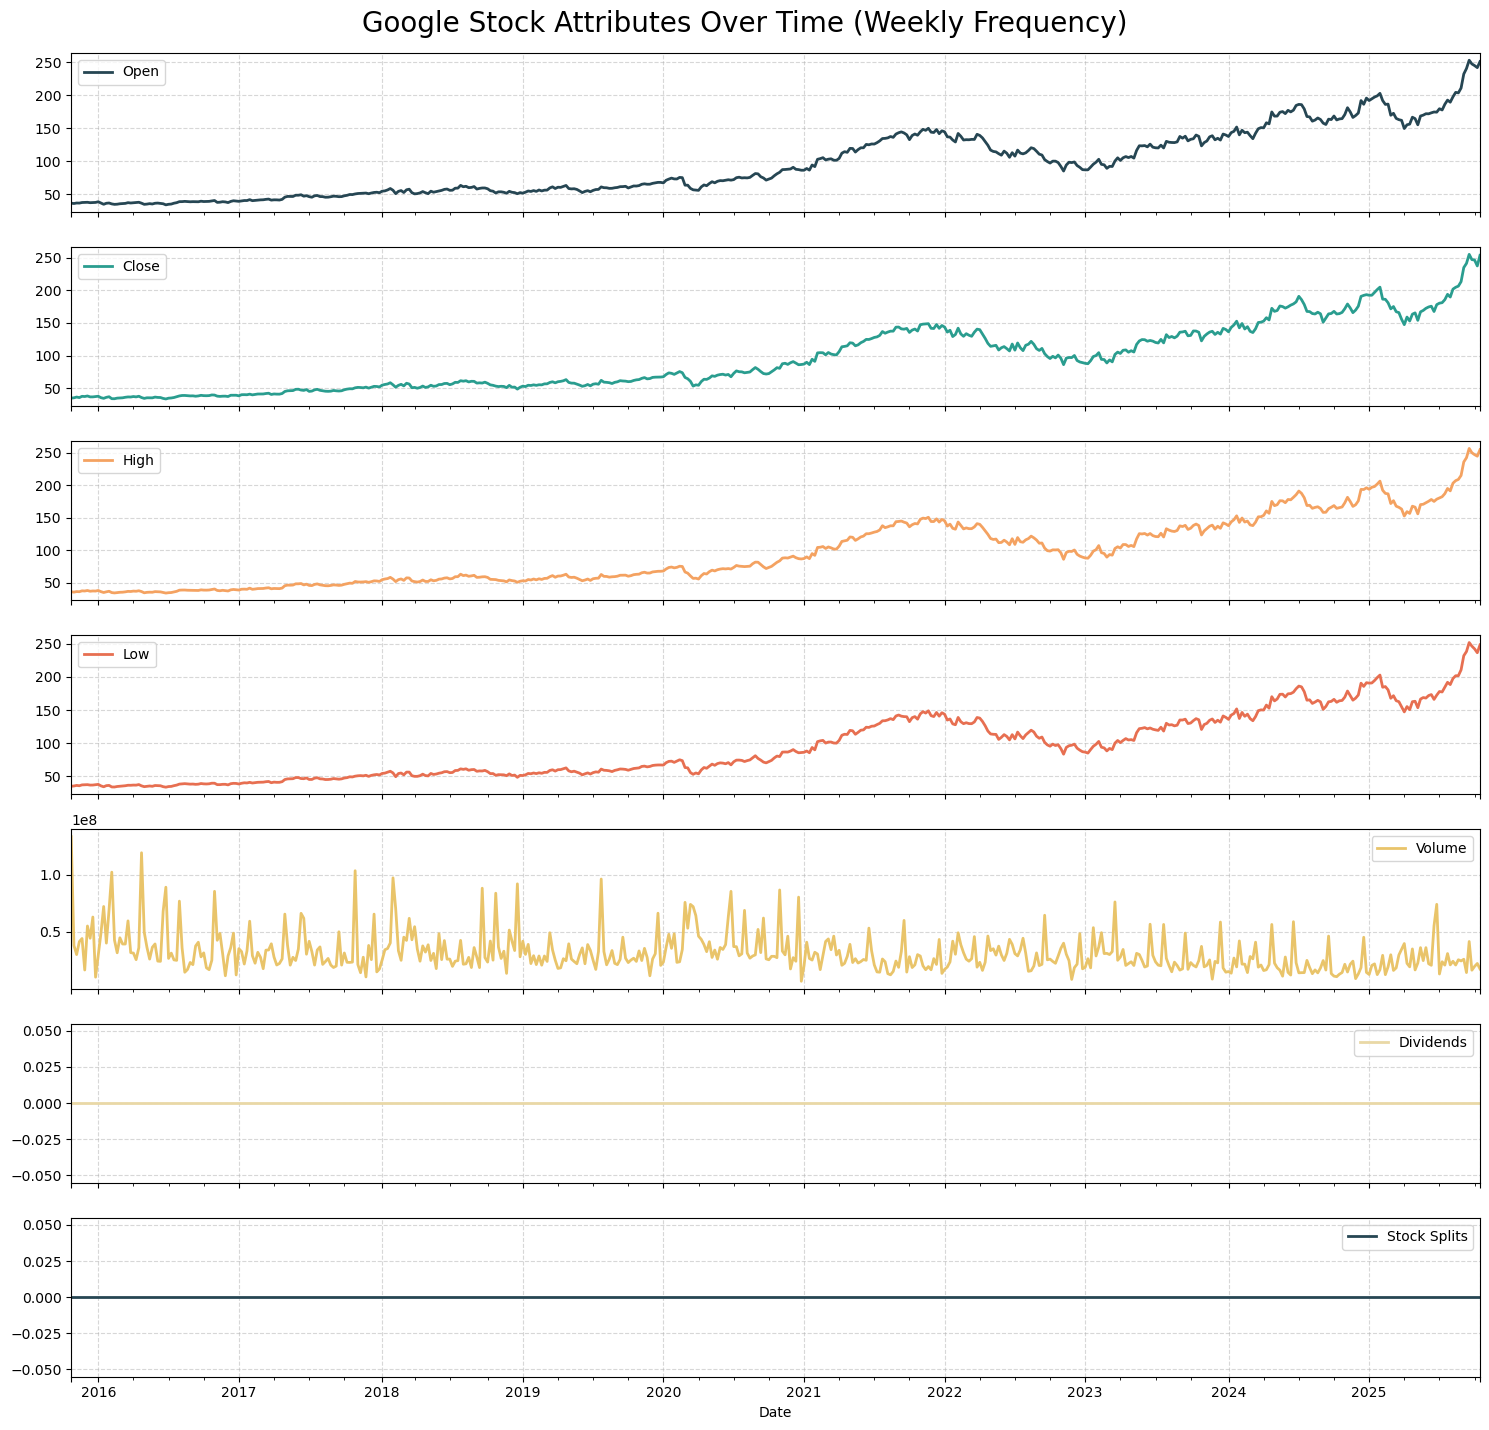

In [42]:

colors = ['#264653', '#2a9d8f', '#f4a261', '#e76f51', '#e9c46a', '#e9d8a6']
df_weekly = df.asfreq('W', method='ffill')
df_weekly.plot(subplots=True, figsize=(15, 15), style='-', color=colors, linewidth=2)
plt.suptitle('Google Stock Attributes Over Time (Weekly Frequency)', fontsize=20, y=0.95)
for ax in plt.gcf().get_axes():
    ax.grid(True, linestyle='--', alpha=0.5)
    ax.set_title(ax.get_title(), fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.96])  
plt.show()

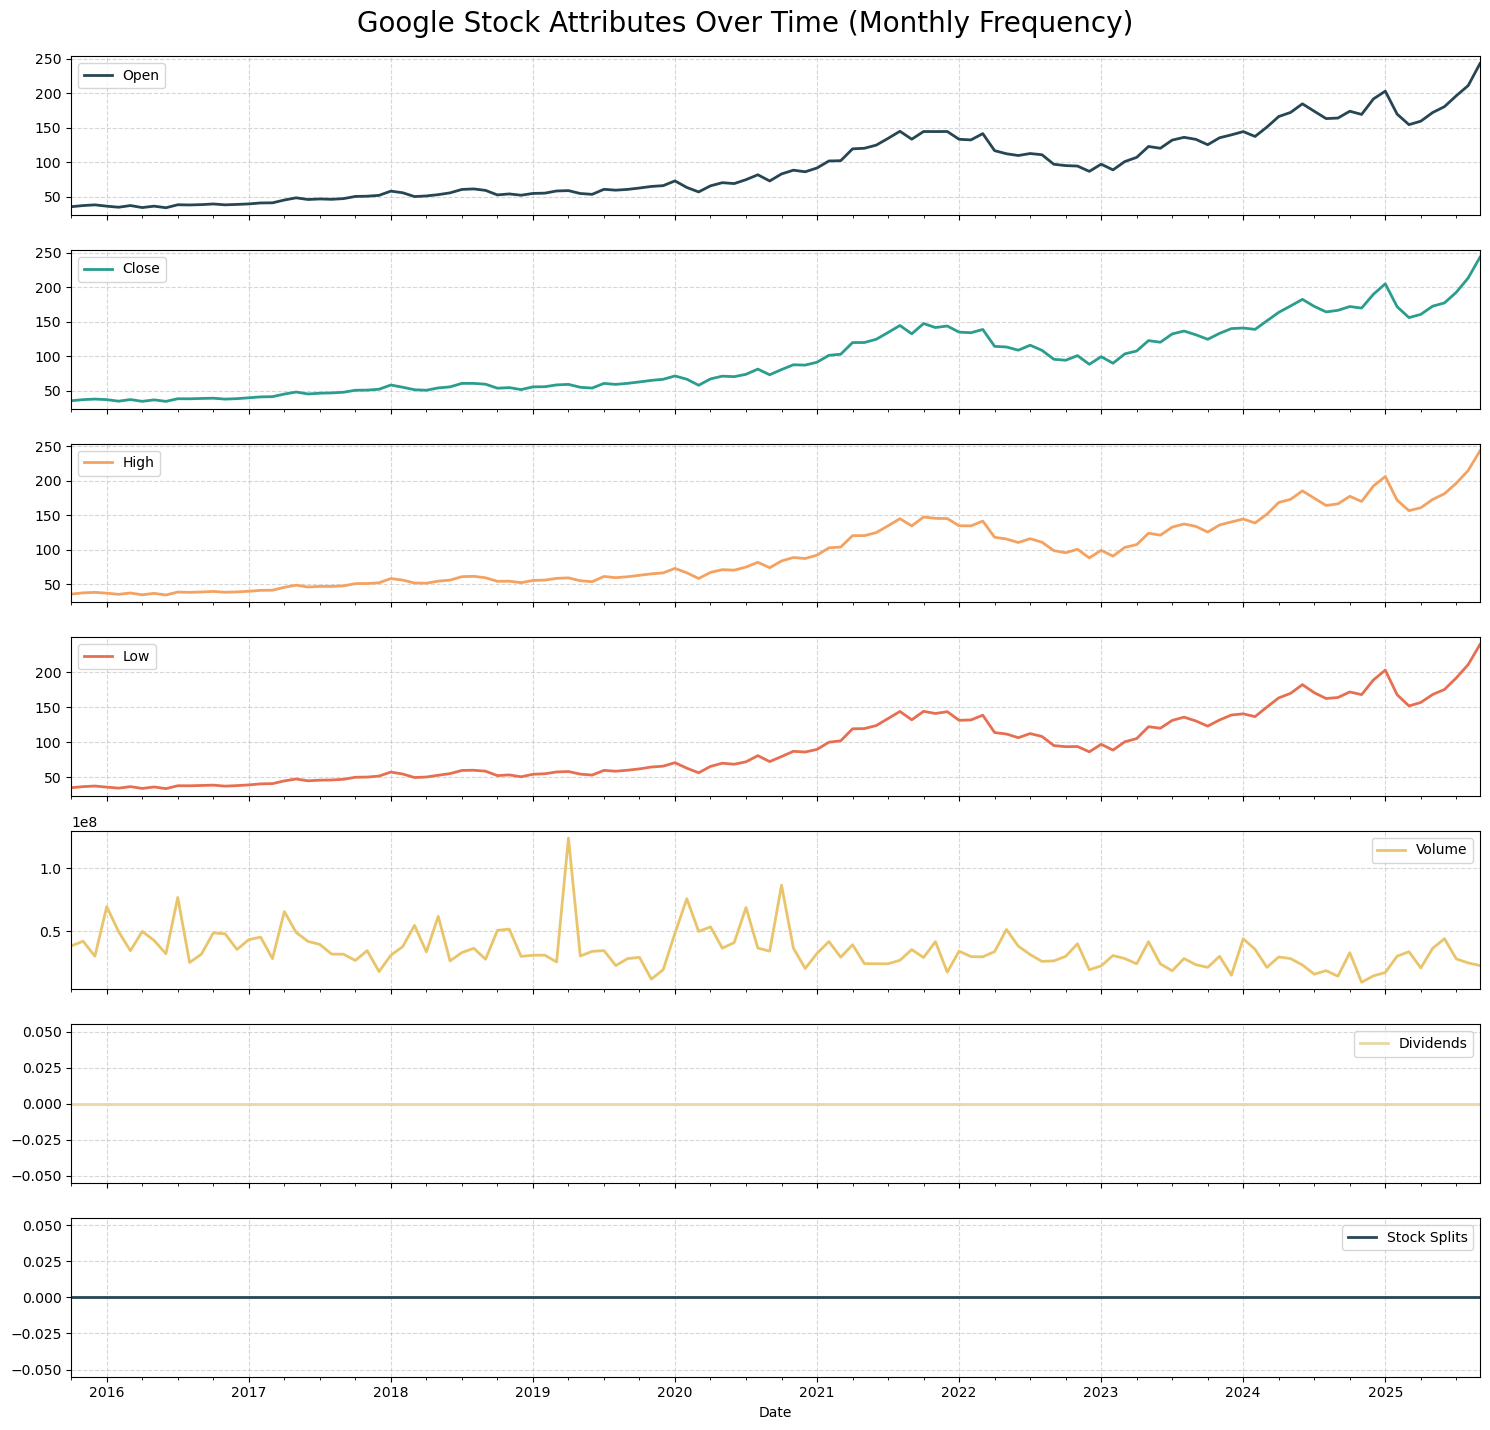

In [43]:
colors = ['#264653', '#2a9d8f', '#f4a261', '#e76f51', '#e9c46a', '#e9d8a6']
df_weekly = df.asfreq('M', method='ffill')
df_weekly.plot(subplots=True, figsize=(15, 15), style='-', color=colors, linewidth=2)
plt.suptitle('Google Stock Attributes Over Time (Monthly Frequency)', fontsize=20, y=0.95)
for ax in plt.gcf().get_axes():
    ax.grid(True, linestyle='--', alpha=0.5)
    ax.set_title(ax.get_title(), fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.96])  
plt.show()

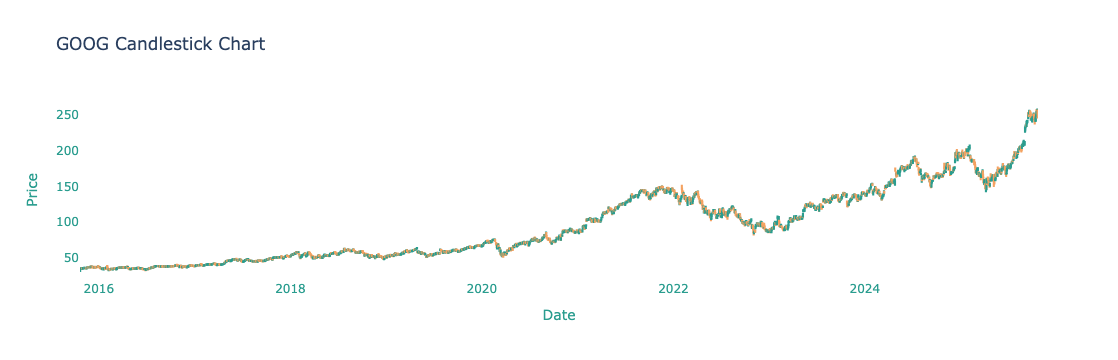

In [44]:
# trace for candlestick chart
candletrace = go.Candlestick(
    x=df.index,
    open=df['Open'],
    high=df['High'],
    low=df['Low'],
    close=df['Close'],
    name='Candlestick',
    increasing=dict(line=dict(color='#2a9d8f')),
    decreasing=dict(line=dict(color='#f4a261')))
# layout for the chart with custom colors
layout = go.Layout(
    title='GOOG Candlestick Chart',
    xaxis=dict(title='Date', color='#2a9d8f'),
    yaxis=dict(title='Price', color='#2a9d8f', rangemode='normal'),
    plot_bgcolor='rgba(0,0,0,0)',  # transparent background
    paper_bgcolor='rgba(255,255,255,0.85)')  # slight transparency on paper background)
# creating the figure
fig = go.Figure(data=[candletrace], layout=layout)
# removing the range slider and showing the figure
fig.update_layout(xaxis_rangeslider_visible=False)
fig.show()

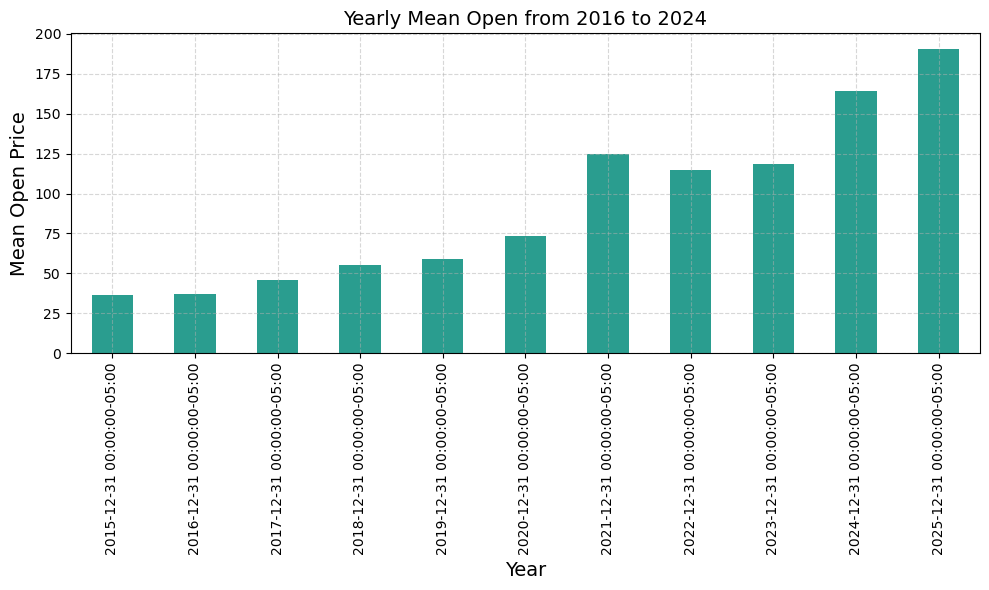

In [46]:

import math
import yfinance as yf
import datetime as dt
# Resampling the 'Open' data by year-end and plotting the mean values
plt.figure(figsize=(10, 6))  # Set figure size
df['Open'].resample('A').mean().plot(kind='bar', color='#2a9d8f')  # Updated color
plt.title('Yearly Mean Open from 2016 to 2024', fontsize=14)  # Title with larger font
plt.xlabel('Year', fontsize=14)  # X-axis label with larger font
plt.ylabel('Mean Open Price', fontsize=14)  # Y-axis label with larger font
plt.grid(True, linestyle='--', alpha=0.5)  # Grid with dashed lines
plt.tight_layout()  # Adjust layout to fit everything nicely
plt.show()

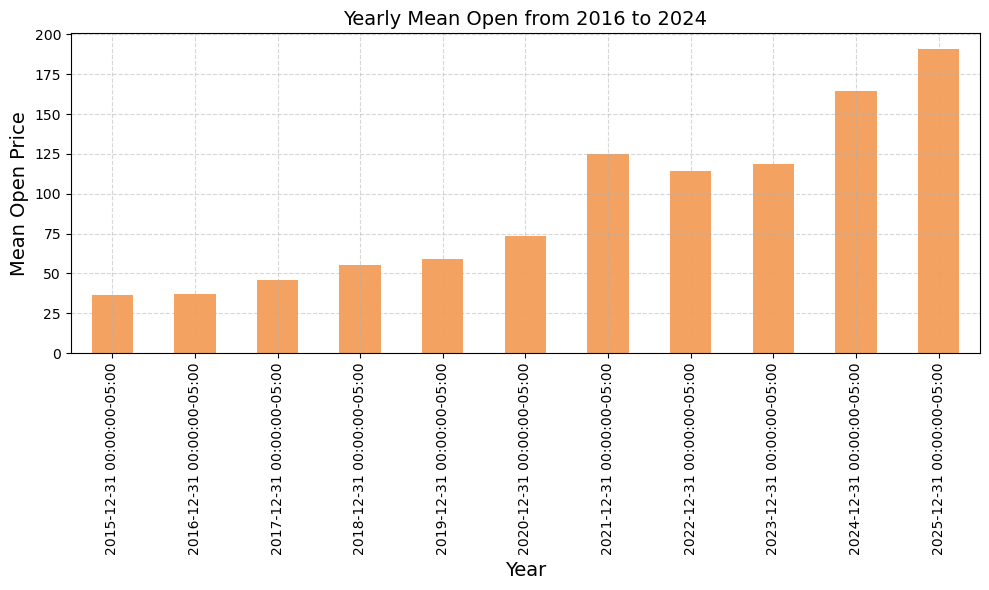

In [47]:
plt.figure(figsize=(10, 6)) 
df['Close'].resample('A').mean().plot(kind='bar', color='#f4a261')
plt.title('Yearly Mean Open from 2016 to 2024', fontsize=14) 
plt.xlabel('Year', fontsize=14)  
plt.ylabel('Mean Open Price', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout() 
plt.show()

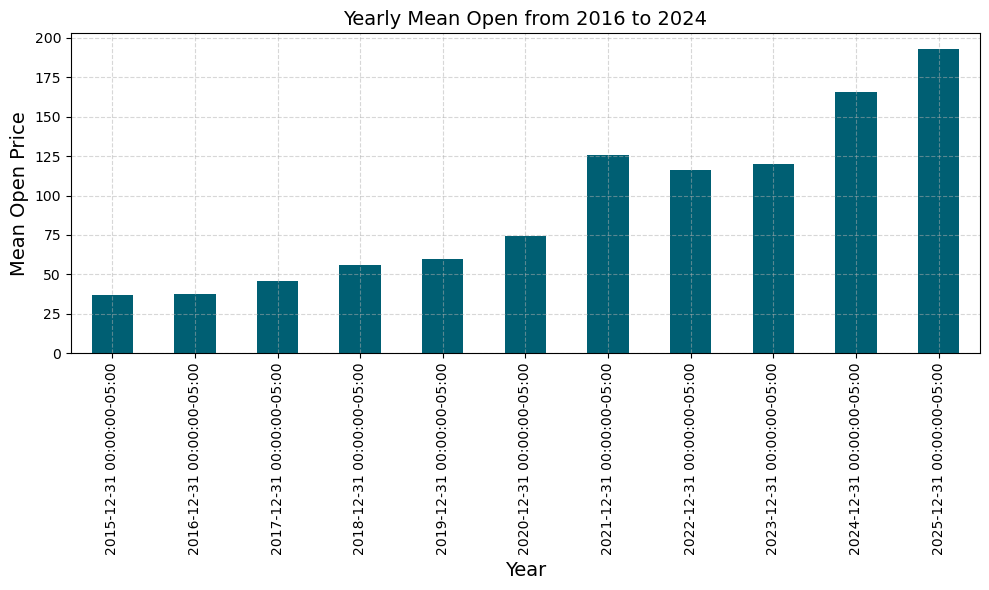

In [48]:
plt.figure(figsize=(10, 6)) 
df['High'].resample('A').mean().plot(kind='bar', color='#005f73')
plt.title('Yearly Mean Open from 2016 to 2024', fontsize=14) 
plt.xlabel('Year', fontsize=14)  
plt.ylabel('Mean Open Price', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout() 
plt.show()

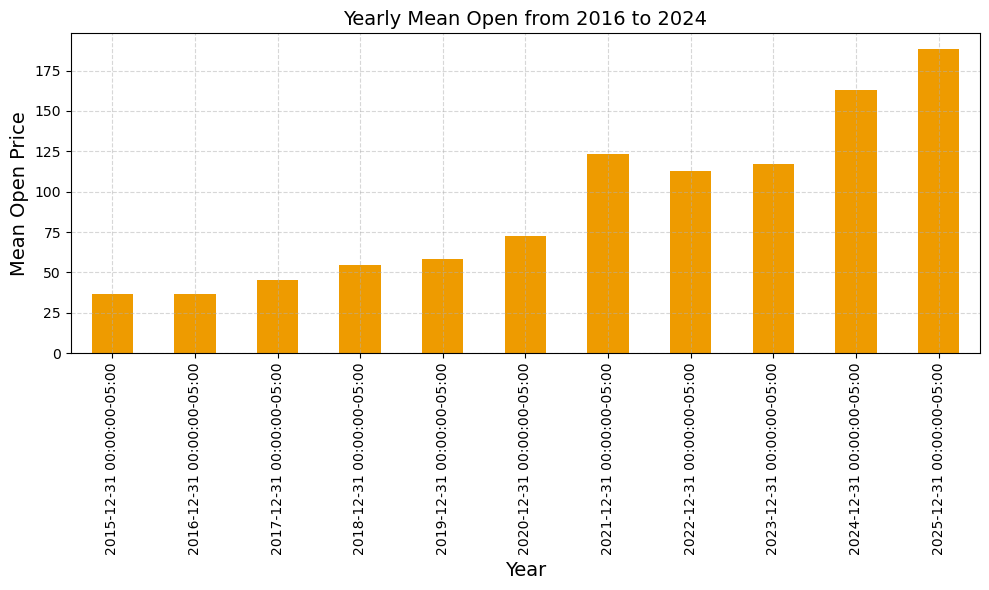

In [49]:
plt.figure(figsize=(10, 6)) 
df['Low'].resample('A').mean().plot(kind='bar', color='#ee9b00')
plt.title('Yearly Mean Open from 2016 to 2024', fontsize=14) 
plt.xlabel('Year', fontsize=14)  
plt.ylabel('Mean Open Price', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout() 
plt.show()

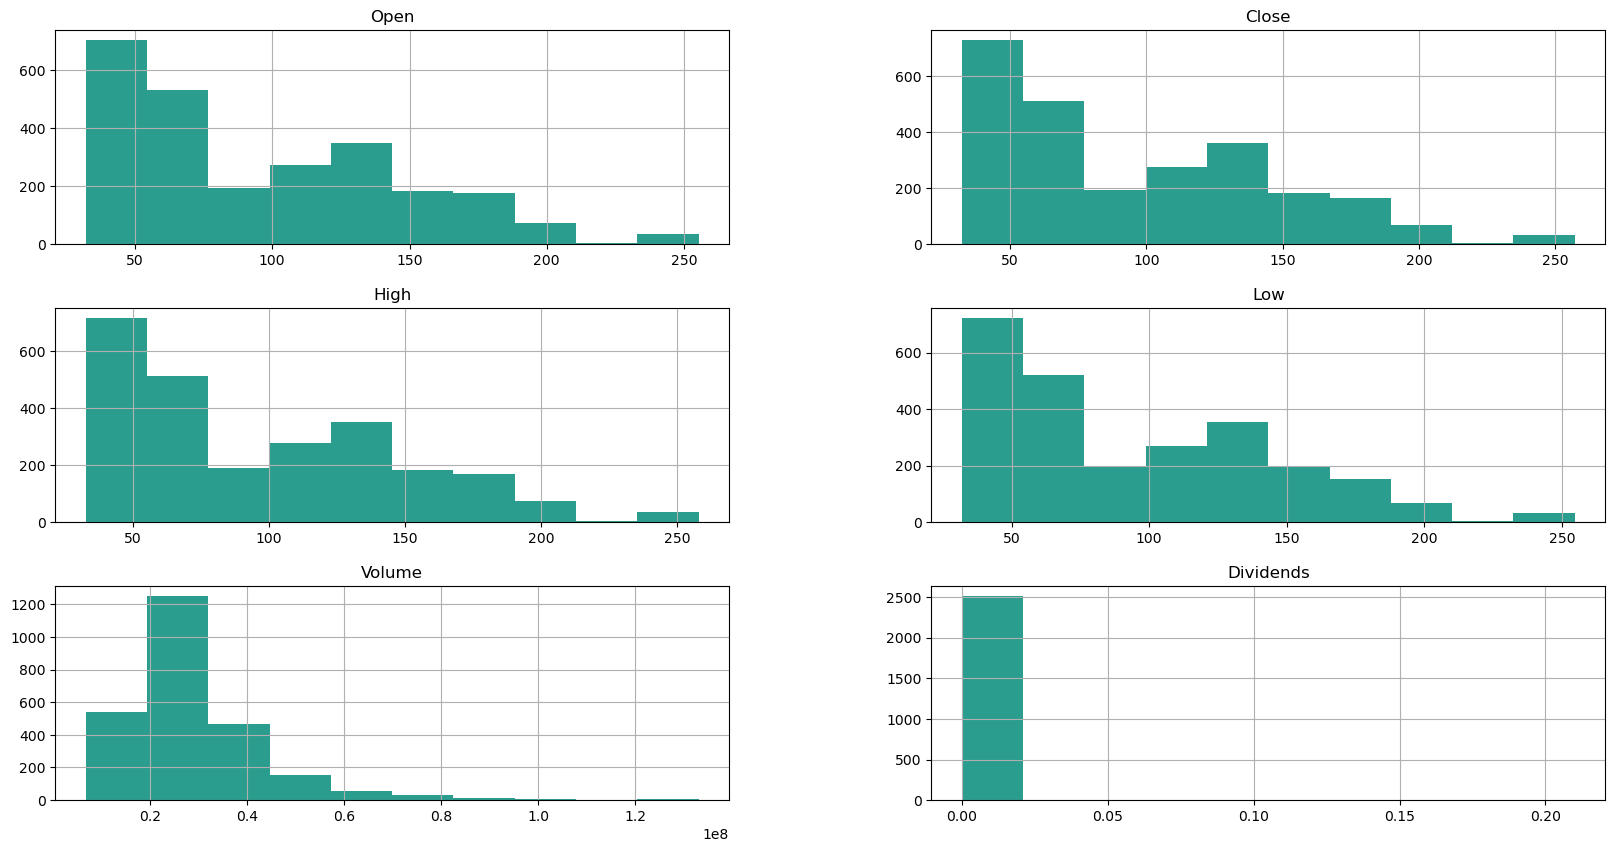

In [50]:
df1 = df.copy()
df1.drop("Stock Splits", axis=1, inplace=True)
fig = plt.figure(figsize = (20,10))
ax = fig.gca()
hist=df1.hist(ax = ax , color= '#2a9d8f')

Close
Date                                 
2015-10-22 00:00:00-04:00   32.367996
2015-10-23 00:00:00-04:00   34.861435
2015-10-26 00:00:00-04:00   35.396770
2015-10-27 00:00:00-04:00   35.183731
2015-10-28 00:00:00-04:00   35.405212
...                               ...
2025-10-16 00:00:00-04:00  251.880005
2025-10-17 00:00:00-04:00  253.789993
2025-10-20 00:00:00-04:00  257.019989
2025-10-21 00:00:00-04:00  251.339996
2025-10-22 00:00:00-04:00  252.529999

[2515 rows x 1 columns]

SMA (Simple Moving Average)
Calculating the moving averages for certain periods and different window sizes

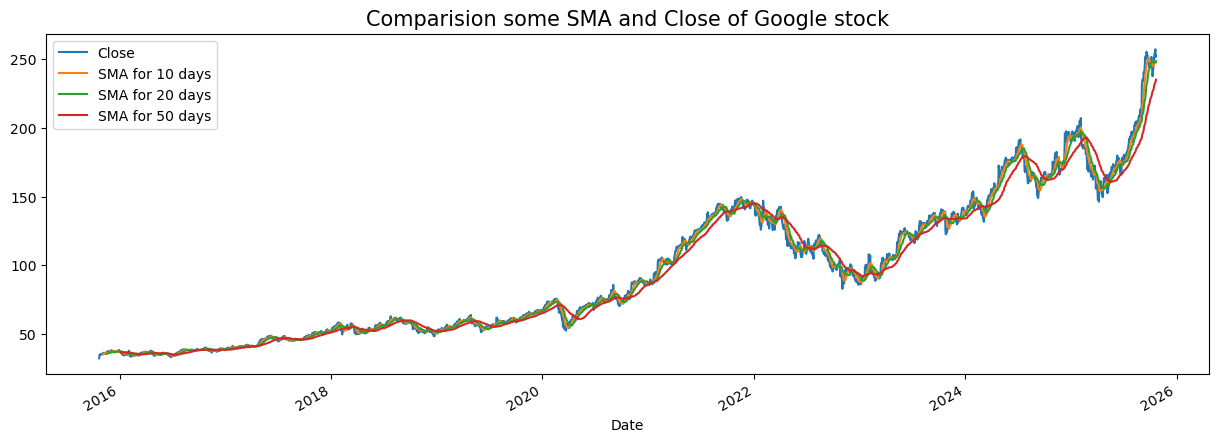

In [56]:
md = [10, 20, 50]
for SMA in md:
    col = f'SMA for {SMA} days'
    df[col] = df['Close'].rolling(SMA).mean()
df[['Close', 'SMA for 10 days', 'SMA for 20 days', 'SMA for 50 days']].plot(figsize=(15,5))
plt.title('Comparision some SMA and Close of Google stock', fontsize=15)
plt.show()

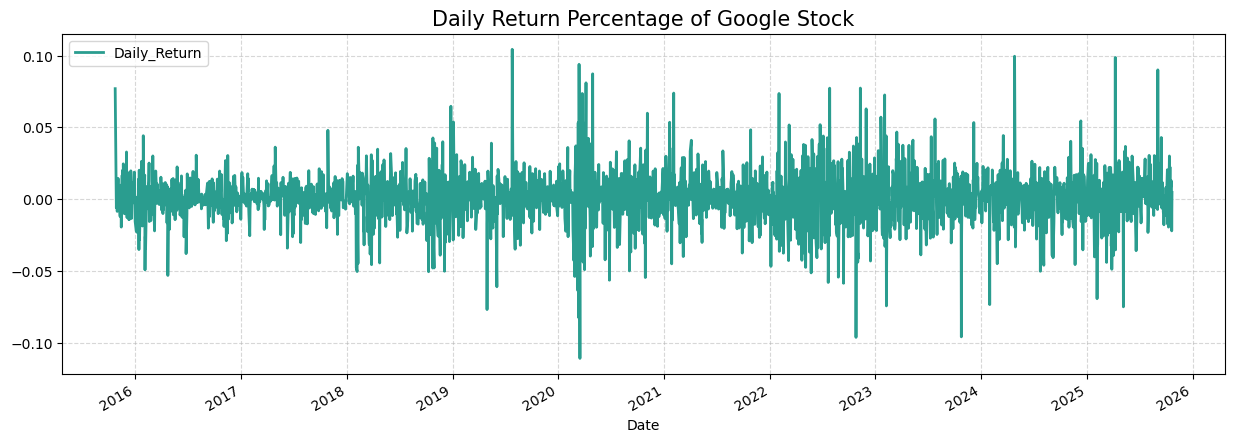

In [57]:
df['Daily_Return'] = df['Close'].pct_change()
df['Daily_Return'].plot(legend=True, figsize=(15, 5), color='#2a9d8f', linewidth=2)
plt.title('Daily Return Percentage of Google Stock', fontsize=15)
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

In [58]:
# Create a deep copy of the original dataframe
df2 = df.copy(deep=True)

# Initialize the MinMaxScaler
scaler = MinMaxScaler(feature_range=(-1, 1))

# Apply scaling to each column individually
df2['Open'] = scaler.fit_transform(df2.Open.values.reshape(-1, 1))
df2['High'] = scaler.fit_transform(df2.High.values.reshape(-1, 1))
df2['Low'] = scaler.fit_transform(df2.Low.values.reshape(-1, 1))
df2['Close'] = scaler.fit_transform(df2.Close.values.reshape(-1, 1))
df2['Volume'] = scaler.fit_transform(df2.Volume.values.reshape(-1, 1))

# Select the relevant columns for further processing
df3 = df2[['Open', 'High', 'Low', 'Volume', 'Close']].values

# Output the shape of the resulting dataframe
df3.shape

(2515, 5)

Modeling (Tensorflow)

Time Series Forecasting with Recurrent Neural Networks (RNN)

Time Series Data: In a time series, each data point is associated with a timestamp indicating when the observation was made. This type of data is widely used in fields such as finance, economics, weather forecasting, and machine learning. A key characteristic of time series data is its tendency to exhibit patterns or trends over time, such as seasonal variations or cyclical behaviors. By analyzing these patterns, predictions can be made, and insights into the underlying events can be gained.

Recurrent Neural Networks (RNN) leverage the temporal relationships within the data, as they maintain a form of memory regarding previous inputs. This makes RNNs particularly well-suited for sequential time series data. RNN, a model created to retain information in short-term memory for predicting future values, seems ideal for our dataset because the autocorrelations indicate no seasonality and are influenced by recent prices. Additionally, we'll implement LSTM, a specialized version of RNN, which could uncover interesting long-term dependencies or relationships within the data.

Preparing Data for Time Series

To set up the dataset for predicting stock prices, we need to treat it as a time series challenge. We'll utilize the prices from the previous 10 days to forecast the next day's price. Let's create the sequences accordingly:

In [60]:

seq_len = 11
sequence = []
for index in range(len(df3) - seq_len + 1): 
    sequence.append(df3[index: index + seq_len])
sequence = np.array(sequence)
print(sequence.shape)

(2505, 11, 5)



Splitting the Data

Deviding the dataset into the training set (80%), test set (10%), & validation set (10%).

In [61]:
def split_data(sequence):
    train_data, test_data = train_test_split(sequence, test_size=0.2, shuffle=False)
    val_data, test_data = train_test_split(test_data, test_size=0.5, shuffle=False)
    return train_data, val_data, test_data

In [62]:
train_data, val_data, test_data = split_data(sequence)
print("Train:", train_data.shape, "Validation:", val_data.shape, "Test:", test_data.shape)

Train: (2004, 11, 5) Validation: (250, 11, 5) Test: (251, 11, 5)


In [63]:
x_train = train_data[:, :-1, :]
y_train = train_data[:, -1, -1] 
x_valid = val_data[:, :-1, :]
y_valid = val_data[:, -1, -1]
x_test = test_data[:, :-1, :]
y_test = test_data[:, -1, -1]
print(f"x_train shape: {x_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"x_valid shape: {x_valid.shape}")
print(f"y_valid shape: {y_valid.shape}")
print(f"x_test shape: {x_test.shape}")
print(f"y_test shape: {y_test.shape}")

x_train shape: (2004, 10, 5)
y_train shape: (2004,)
x_valid shape: (250, 10, 5)
y_valid shape: (250,)
x_test shape: (251, 10, 5)
y_test shape: (251,)


Defining Model

Using Long Short-term Memory (LSTM) to capture the sequential information.

In [68]:
!pip install protobuf==3.20.0

# Now import the libraries and build the model
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
model_lstm = Sequential()
model_lstm.add(LSTM(units=64, return_sequences=True, input_shape=(x_train.shape[1], x_train.shape[2])))
model_lstm.add(LSTM(units=32, return_sequences=False))
model_lstm.add(Dense(units=25))
model_lstm.add(Dense(units=1))

# Compile the model
model_lstm.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model_lstm.fit(x_train, y_train, epochs=50, batch_size=32,
                       validation_data=(x_valid, y_valid))

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.1/162.1 kB 3.4 MB/s eta 0:00:00a 0:00:01
  Attempting uninstall: protobuf
    Found existing installation: protobuf 6.33.0
    Uninstalling protobuf-6.33.0:
      Successfully uninstalled protobuf-6.33.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.20.0 requires protobuf>=5.28.0, but you have protobuf 3.20.0 which is incompatible.
Epoch 1/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0168 - val_loss: 0.0035
Epoch 2/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 9.0598e-04 - val_loss: 0.0062
Epoch 3/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7.5230e-04 - val_loss: 0.0066
Epoch 4/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 6.9324e-04 - val_loss: 0.0064
Epoch 5/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 6.7499e-04 - val_loss: 0.0079
Epoch 6/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s

In [69]:
# Predict on the test data
y_pred = model_lstm.predict(x_test)

# Evaluate the predictions
test_loss = model_lstm.evaluate(x_test, y_test)
print("Test Loss:", test_loss)

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0068
Test Loss: 0.006775574292987585


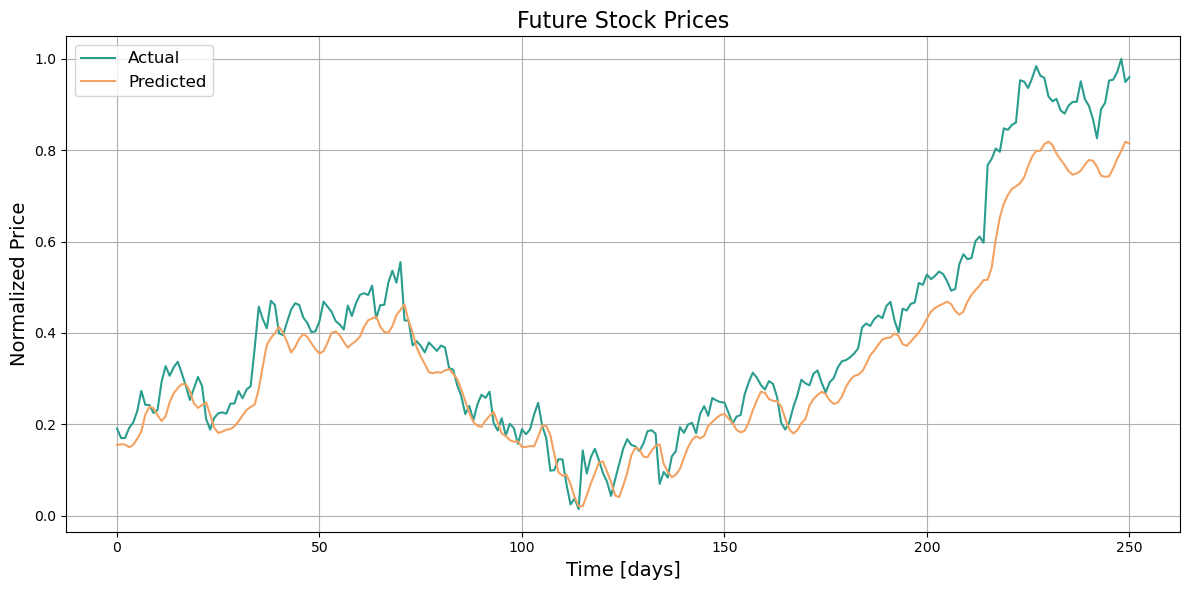

In [70]:
plt.figure(figsize=(12, 6))
idx = 0
plt.plot(y_test, color='#2a9d8f', label='Actual')  
plt.plot(y_pred, color='#f4a261', label='Predicted') 
plt.title('Future Stock Prices', fontsize=16)
plt.xlabel('Time [days]', fontsize=14)
plt.ylabel('Normalized Price', fontsize=14)
plt.legend(loc='best', fontsize=12)
plt.grid()
plt.tight_layout() 
plt.show()

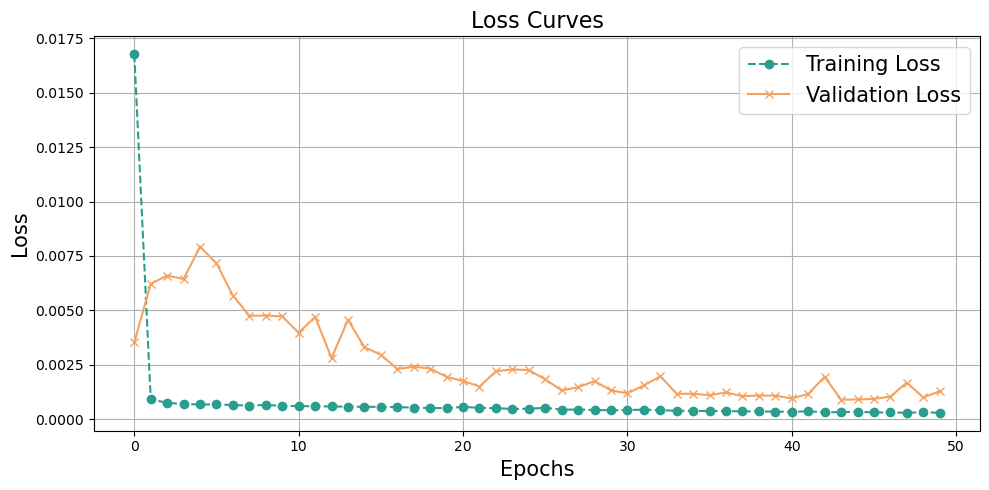

In [71]:
# Plotting the loss curves
def plot_loss_curve(history):
    plt.figure(figsize=(10, 5))

    # Loss curve
    plt.plot(history.history['loss'], label='Training Loss', color='#2a9d8f', marker='o', linestyle='--')
    plt.plot(history.history['val_loss'], label='Validation Loss', color='#f4a261', marker='x', linestyle='-')
    
    plt.title('Loss Curves', fontsize=16)
    plt.xlabel('Epochs', fontsize=15)
    plt.ylabel('Loss', fontsize=15)
    plt.legend(fontsize=15)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Call the function to plot the loss curve
plot_loss_curve(history)

In [72]:
print("### Model Summary ###")
model_lstm.summary()

### Model Summary ###


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 10, 64)         │        17,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 32)             │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 25)             │           825 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 93,563 (365.48 KB)

 Trainable params: 31,187 (121.82 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 62,376 (243.66 KB)

In [79]:
!pip install mplfinance

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 3.6 MB/s eta 0:00:00


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


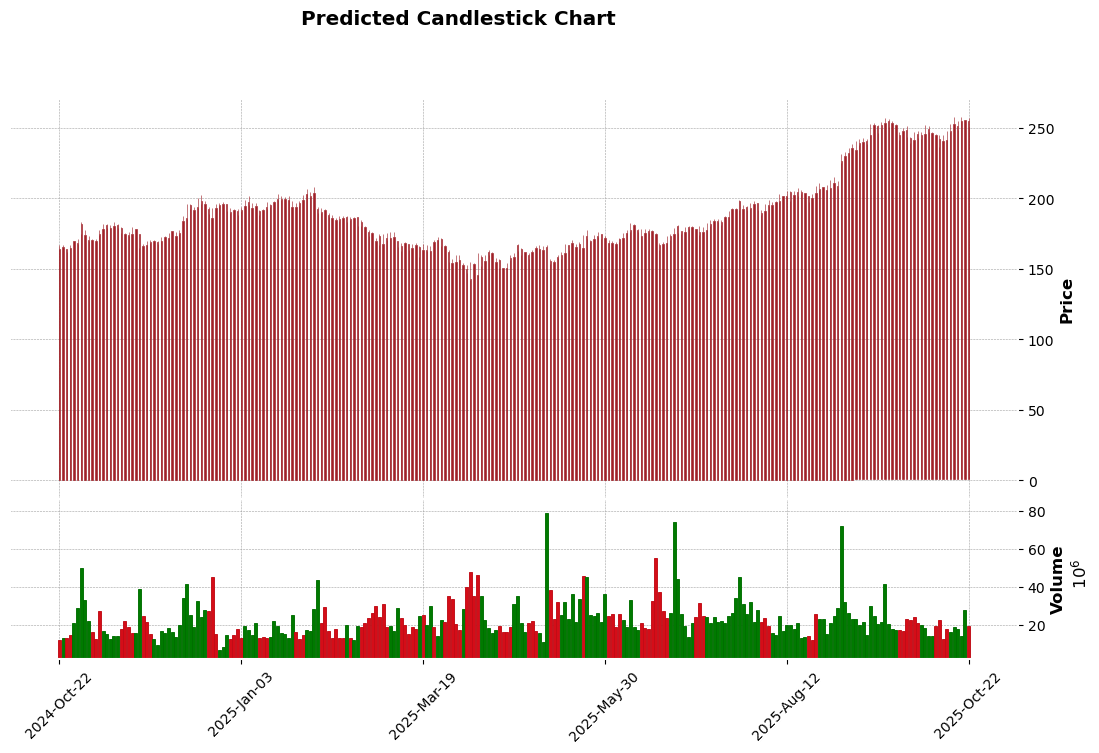

In [81]:
import mplfinance as mpf
predicted_prices = model_lstm.predict(x_test)
predicted_df = df.iloc[-len(predicted_prices):].copy()  
predicted_df['Predicted Close'] = predicted_prices
predicted_df['Open'] = predicted_df['Open']  
predicted_df['High'] = predicted_df['High']
predicted_df['Low'] = predicted_df['Low']
predicted_df['Close'] = predicted_df['Predicted Close']  
final_df = predicted_df[['Open', 'High', 'Low', 'Close', 'Volume']].copy()
final_df.index = pd.to_datetime(predicted_df.index) 
mpf.plot(
    final_df,
    type='candle',
    volume=True,
    style='charles',
    title="Predicted Candlestick Chart",
    ylabel="Price",
    ylabel_lower="Volume",
    figsize=(14, 8) 
)

In [82]:
df = df.reset_index()  # This will move the index (Date) into a regular column.

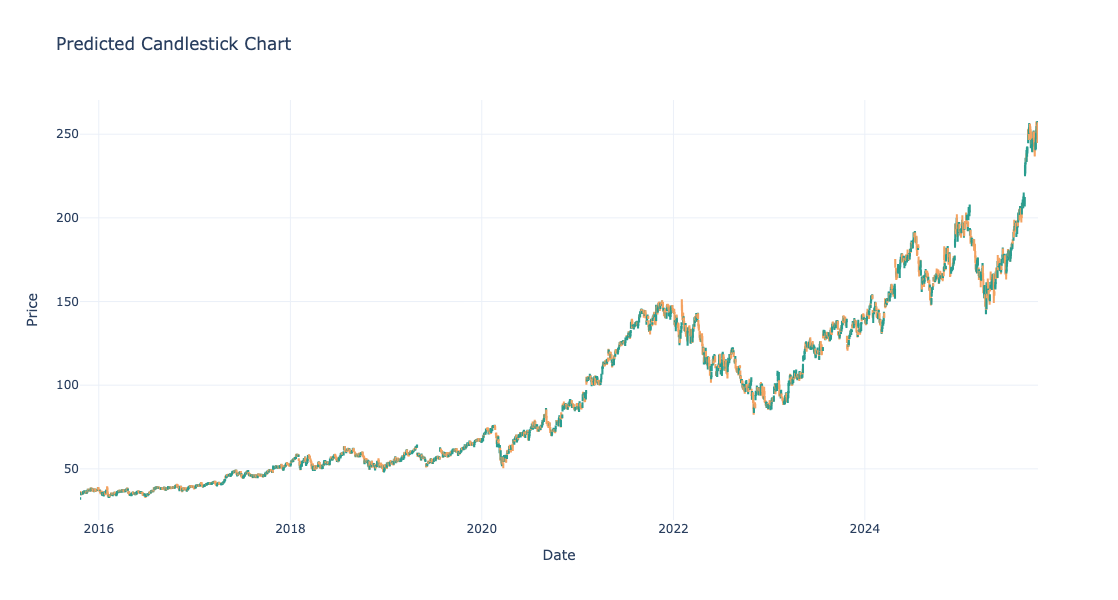

In [83]:
# Assume df contains the main data with daily prices.
# Example data setup:
# df = pd.DataFrame({
#     'Open': [...],
#     'High': [...],
#     'Low': [...],
#     'Close': [...],
# })

# Ensure the DataFrame is ordered correctly
df['Date'] = pd.to_datetime(df['Date'])  # Assuming there is a column named Date
df.set_index('Date', inplace=True)

# Select prices for the candlestick
final_df = df[['Open', 'High', 'Low', 'Close']]

# Create the candlestick chart
candlestick_trace = go.Candlestick(
    x=final_df.index,
    open=final_df['Open'],
    high=final_df['High'],
    low=final_df['Low'],
    close=final_df['Close'],
    name='Candlestick',
    increasing_line_color='#2a9d8f',  # Color for increasing candles
    decreasing_line_color='#f4a261',    # Color for decreasing candles
)

# Create the figure
fig = go.Figure(data=[candlestick_trace])

# Add title and labels
fig.update_layout(
    title='Predicted Candlestick Chart',
    xaxis_title='Date',
    yaxis_title='Price',
    xaxis_rangeslider_visible=False,  # Disable the range slider below the chart
    template='plotly_white',            # Use a light template
    height=600,                         # Height of the chart
    width=1000                          # Width of the chart
)

# Show the chart
fig.show()

In [84]:
# Predicting the next 10 days
latest_prediction = []
last_seq = x_test[:-1]

for _ in range(10):
    prediction = model_lstm.predict(last_seq)
    latest_prediction.append(prediction)

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [85]:
df = df.reset_index()  # This will move the index (Date) into a regular column.

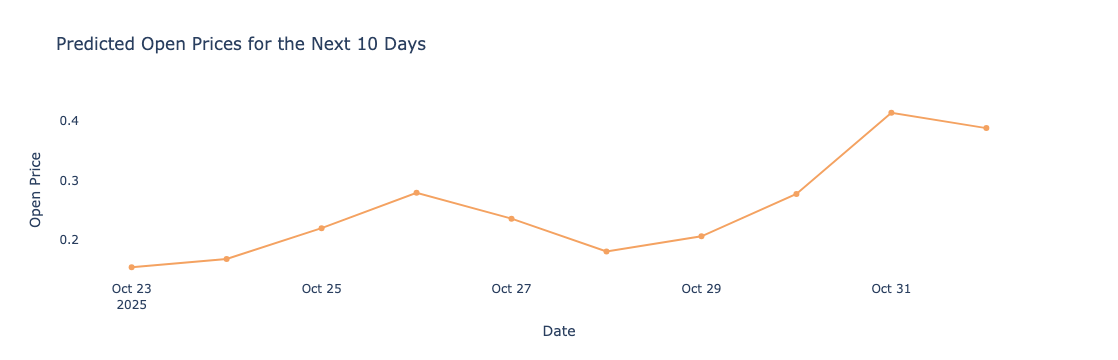

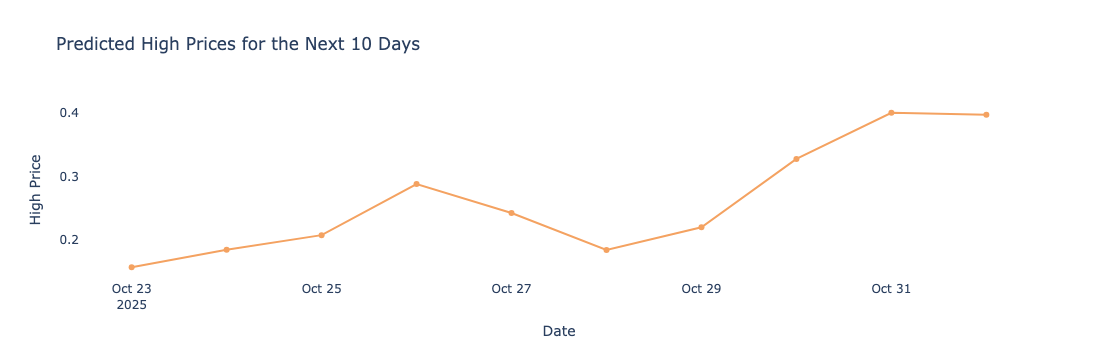

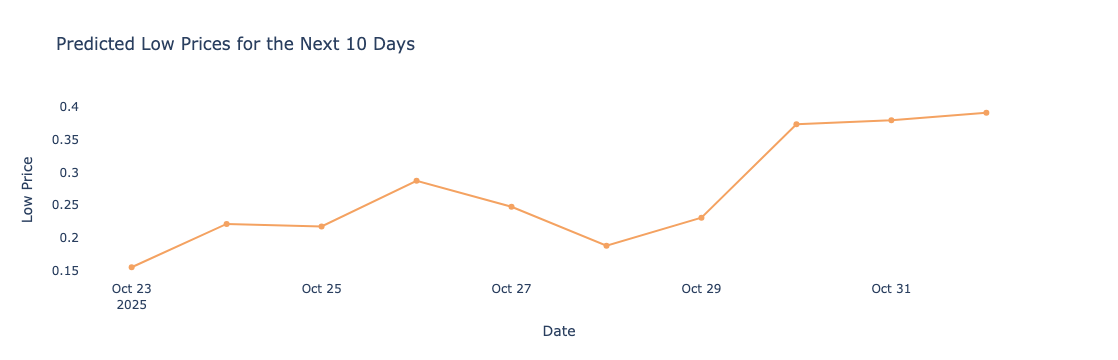

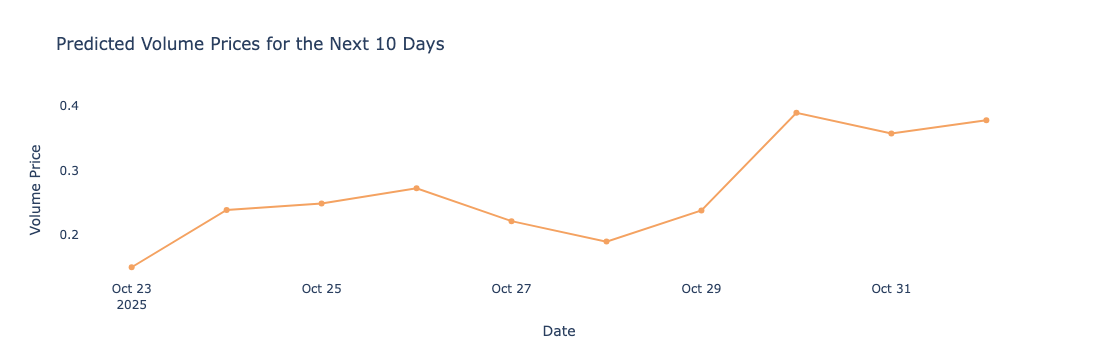

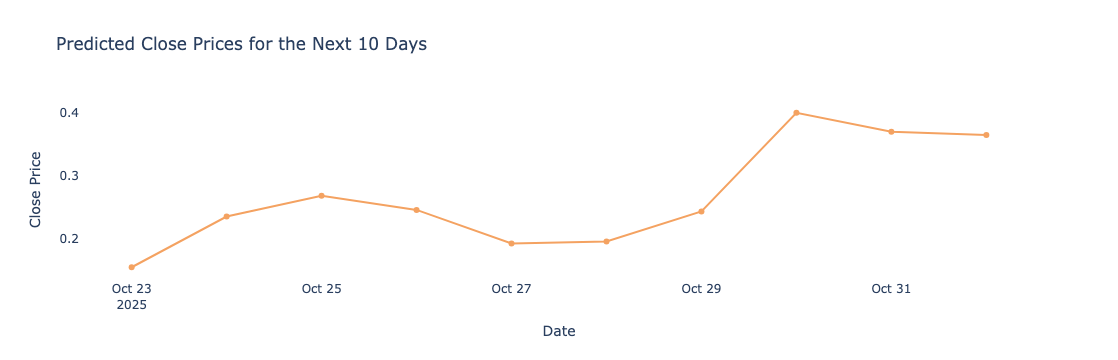

In [86]:
predicted_data_next = np.array(latest_prediction).reshape(-1, 5)
last_date = df['Date'].max()
next_10_days = [last_date + timedelta(days=i) for i in range(1, 11)]

# Iterate over all features
for i, feature_name in enumerate(['Open', 'High', 'Low', 'Volume', 'Close']):
    fig = go.Figure()

    fig.add_trace(go.Scatter(
        x=next_10_days,
        y=predicted_data_next[:, i],
        mode='lines+markers',
        name=f'Predicted {feature_name.capitalize()} Prices',
        line=dict(color='#f4a261'), 
        marker=dict(color='#f4a261')  
    ))

    fig.update_layout(
        title=f'Predicted {feature_name.capitalize()} Prices for the Next 10 Days',
        xaxis_title='Date',
        yaxis_title=f'{feature_name.capitalize()} Price',
        plot_bgcolor='white' 
    )

    fig.show()

Modeling (PyTorch)

In [87]:
tck = yf.Ticker("GOOG")
# defining the start date 
start_date = "2016-06-14"
# historical data
df5 = tck.history(start=start_date, end=None)
df5

Open        High         Low       Close  \
Date                                                                        
2016-06-14 00:00:00-04:00   35.580519   35.877983   35.413657   35.669411   
2016-06-15 00:00:00-04:00   35.705661   35.903306   35.621736   35.701687   
2016-06-16 00:00:00-04:00   35.502551   35.588961   34.924009   35.276600   
2016-06-17 00:00:00-04:00   35.191672   35.200118   34.188637   34.350925   
2016-06-20 00:00:00-04:00   34.701032   34.885272   34.434855   34.449753   
...                               ...         ...         ...         ...   
2025-11-04 00:00:00-05:00  277.065002  281.834015  276.864990  278.059998   
2025-11-05 00:00:00-05:00  279.380005  286.700012  277.880005  284.750000   
2025-11-06 00:00:00-05:00  285.734985  288.809998  281.619995  285.339996   
2025-11-07 00:00:00-05:00  284.209991  284.500000  275.739990  279.700012   
2025-11-10 00:00:00-05:00  285.265015  291.459991  283.540009  290.589996   

                             Volume  Dividends  Stock Splits  
Date                                                          
2016-06-14 00:00:00-04:00  26122000        0.0           0.0  
2016-06-15 00:00:00-04:00  24290000        0.0           0.0  
2016-06-16 00:00:00-04:00  39650000        0.0           0.0  
2016-06-17 00:00:00-04:00  68048000        0.0           0.0  
2016-06-20 00:00:00-04:00  41650000        0.0           0.0  
...                             ...        ...           ...  
2025-11-04 00:00:00-05:00  18123700        0.0           0.0  
2025-11-05 00:00:00-05:00  20063200        0.0           0.0  
2025-11-06 00:00:00-05:00  23103800        0.0           0.0  
2025-11-07 00:00:00-05:00  21991100        0.0           0.0  
2025-11-10 00:00:00-05:00  19476700        0.0           0.0  

[2367 rows x 7 columns]

In [88]:
df5 = df5.reset_index()  # This will move the index (Date) into a regular column.

In [89]:
df5['Volume'] = df5['Volume'].astype('float64')

In [90]:
sma_days = [10, 20, 50]
# Calculate SMAs for each window size and add them to the dataframe
for sma in sma_days:
    col_name = f'SMA_{sma}days'
    df5[col_name] = df5['Close'].rolling(sma).mean()

In [91]:
df5['SMA_10days'] = df5['SMA_10days'].fillna(df5['Close'])
df5['SMA_20days'] = df5['SMA_20days'].fillna(df5['Close'])
df5['SMA_50days'] = df5['SMA_50days'].fillna(df5['Close'])

df5.head(15)

Date       Open       High        Low      Close  \
0  2016-06-14 00:00:00-04:00  35.580519  35.877983  35.413657  35.669411   
1  2016-06-15 00:00:00-04:00  35.705661  35.903306  35.621736  35.701687   
2  2016-06-16 00:00:00-04:00  35.502551  35.588961  34.924009  35.276600   
3  2016-06-17 00:00:00-04:00  35.191672  35.200118  34.188637  34.350925   
4  2016-06-20 00:00:00-04:00  34.701032  34.885272  34.434855  34.449753   
5  2016-06-21 00:00:00-04:00  34.682659  34.899676  34.365330  34.560497   
6  2016-06-22 00:00:00-04:00  34.715433  34.804821  34.418564  34.635979   
7  2016-06-23 00:00:00-04:00  34.635482  34.858951  34.116530  34.854977   
8  2016-06-24 00:00:00-04:00  33.529051  34.235717  33.443637  33.531536   
9  2016-06-27 00:00:00-04:00  33.321968  33.386528  32.938790  33.185898   
10 2016-06-28 00:00:00-04:00  33.717759  33.785294  33.421288  33.770893   
11 2016-06-29 00:00:00-04:00  33.917896  34.137838  33.838934  33.973019   
12 2016-06-30 00:00:00-04:00  34.040549  34.380724  33.950168  34.369797   
13 2016-07-01 00:00:00-04:00  34.374769  34.794398  34.371291  34.722885   
14 2016-07-05 00:00:00-04:00  34.566456  34.610156  34.209895  34.511333   

        Volume  Dividends  Stock Splits  SMA_10days  SMA_20days  SMA_50days  
0   26122000.0        0.0           0.0   35.669411   35.669411   35.669411  
1   24290000.0        0.0           0.0   35.701687   35.701687   35.701687  
2   39650000.0        0.0           0.0   35.276600   35.276600   35.276600  
3   68048000.0        0.0           0.0   34.350925   34.350925   34.350925  
4   41650000.0        0.0           0.0   34.449753   34.449753   34.449753  
5   29312000.0        0.0           0.0   34.560497   34.560497   34.560497  
6   23686000.0        0.0           0.0   34.635979   34.635979   34.635979  
7   43428000.0        0.0           0.0   34.854977   34.854977   34.854977  
8   88980000.0        0.0           0.0   33.531536   33.531536   33.531536  
9   52580000.0        0.0           0.0   34.621726   33.185898   33.185898  
10  43476000.0        0.0           0.0   34.431874   33.770893   33.770893  
11  38652000.0        0.0           0.0   34.259008   33.973019   33.973019  
12  31954000.0        0.0           0.0   34.168327   34.369797   34.369797  
13  26894000.0        0.0           0.0   34.205523   34.722885   34.722885  
14  29252000.0        0.0           0.0   34.211681   34.511333   34.511333

In [92]:
ten_days = df5[['Open','High','Low', 'Volume','SMA_10days','Close']].copy(deep=True)
twenty_days = df5[['Open','High','Low', 'Volume','SMA_20days','Close']].copy(deep=True)
all_sma = df5[['Open','High','Low', 'Volume','SMA_10days','SMA_20days','Close']].copy(deep=True)

In [93]:
# Scaling

# 10 days SMA
scaler = MinMaxScaler(feature_range=(0,2)).fit(ten_days.Low.values.reshape(-1,1))
ten_days['Open'] = scaler.transform(ten_days.Open.values.reshape(-1,1))
ten_days['High'] = scaler.transform(ten_days.High.values.reshape(-1,1))
ten_days['Low'] = scaler.transform(ten_days.Low.values.reshape(-1,1))
ten_days['Volume'] = scaler.transform(ten_days.Volume.values.reshape(-1,1))
ten_days['Close'] = scaler.transform(ten_days.Close.values.reshape(-1,1))
ten_days['SMA_10days'] = scaler.transform(ten_days['SMA_10days'].values.reshape(-1,1))

# 20 days SMA
scaler = MinMaxScaler(feature_range=(0,2)).fit(twenty_days.Low.values.reshape(-1,1))
twenty_days['Open'] = scaler.transform(twenty_days.Open.values.reshape(-1,1))
twenty_days['High'] = scaler.transform(twenty_days.High.values.reshape(-1,1))
twenty_days['Low'] = scaler.transform(twenty_days.Low.values.reshape(-1,1))
twenty_days['Volume'] = scaler.transform(twenty_days.Volume.values.reshape(-1,1))
twenty_days['Close'] = scaler.transform(twenty_days.Close.values.reshape(-1,1))
twenty_days['SMA_20days'] = scaler.transform(twenty_days['SMA_20days'].values.reshape(-1,1))

# Both 10 & 20 days SMA
scaler = MinMaxScaler(feature_range=(0,2)).fit(all_sma.Low.values.reshape(-1,1))
all_sma['Open'] = scaler.transform(all_sma.Open.values.reshape(-1,1))
all_sma['High'] = scaler.transform(all_sma.High.values.reshape(-1,1))
all_sma['Low'] = scaler.transform(all_sma.Low.values.reshape(-1,1))
all_sma['Volume'] = scaler.transform(all_sma.Volume.values.reshape(-1,1))
all_sma['Close'] = scaler.transform(all_sma.Close.values.reshape(-1,1))
all_sma['SMA_10days'] = scaler.transform(all_sma['SMA_10days'].values.reshape(-1,1))
all_sma['SMA_20days'] = scaler.transform(all_sma['SMA_20days'].values.reshape(-1,1))

In [94]:
# rescaled dataframes 
data_10days = ten_days[['Open','High','Low', 'SMA_10days','Close']].values
data_20days = twenty_days[['Open','High','Low','SMA_20days','Close']].values
data_all = all_sma[['Open','High','Low', 'SMA_10days','SMA_20days','Close']].values

In [95]:
print(data_10days.shape)
print(data_20days.shape)
print(data_all.shape)

(2367, 5)
(2367, 5)
(2367, 6)


In [96]:
# using the price of the previous 10 days to predict the next day price
seq_len = 11

# 10 days SMA sequence
sequence_10days = []
for index in range(len(data_10days) - seq_len + 1): 
    sequence_10days.append(data_10days[index: index + seq_len])
sequence_10days = np.array(sequence_10days)
print(sequence_10days.shape)

# 20 days SMA sequence
sequence_20days = []
for index in range(len(data_20days) - seq_len + 1): 
    sequence_20days.append(data_20days[index: index + seq_len])
sequence_20days = np.array(sequence_20days)
print(sequence_20days.shape)

# Both SMAs sequence
sequence_all = []
for index in range(len(data_all) - seq_len + 1): 
    sequence_all.append(data_all[index: index + seq_len])
sequence_all = np.array(sequence_all)
print(sequence_all.shape)

(2357, 11, 5)
(2357, 11, 5)
(2357, 11, 6)


In [98]:
# split data
train_data_10days, val_data_10days, test_data_10days = split_data(sequence_10days)
train_data_20days, val_data_20days, test_data_20days = split_data(sequence_20days)
train_data_all, val_data_all, test_data_all = split_data(sequence_all)

In [99]:
ORANGE = "\033[38;5;214m"
RESET = "\033[0m"

# Check shapes of the split data
print(f"{ORANGE}Shapes:\n{RESET}")
print(f"{ORANGE}10 days SMA sequence:{RESET}")
print(f"{ORANGE}Train:{RESET} {train_data_10days.shape} {ORANGE}Validation:{RESET} {val_data_10days.shape} {ORANGE}Test:{RESET} {test_data_10days.shape}")
print(f"{ORANGE}20 days SMA sequence:{RESET}")
print(f"{ORANGE}Train:{RESET} {train_data_20days.shape} {ORANGE}Validation:{RESET} {val_data_20days.shape} {ORANGE}Test:{RESET} {test_data_20days.shape}")
print(f"{ORANGE}Both SMAs sequence:{RESET}")
print(f"{ORANGE}Train:{RESET} {train_data_all.shape} {ORANGE}Validation:{RESET} {val_data_all.shape} {ORANGE}Test:{RESET} {test_data_all.shape}")

Shapes:

10 days SMA sequence:
Train: (1885, 11, 5) Validation: (236, 11, 5) Test: (236, 11, 5)
20 days SMA sequence:
Train: (1885, 11, 5) Validation: (236, 11, 5) Test: (236, 11, 5)
Both SMAs sequence:
Train: (1885, 11, 6) Validation: (236, 11, 6) Test: (236, 11, 6)


In [100]:
# Split X and Y for each dataset
def split_Xy(dataset):
    # Extract features (X) and target (Y)
    X = dataset[:, :-1, :]
    Y = dataset[:, -1, -1]   #last column (close price)
    return X, Y
# Split X and Y for each dataset
x_train_10d, y_train_10d = split_Xy(train_data_10days)
x_val_10d, y_val_10d = split_Xy(val_data_10days)
x_test_10d, y_test_10d = split_Xy(test_data_10days)
x_train_20d, y_train_20d = split_Xy(train_data_20days)
x_val_20d, y_val_20d = split_Xy(val_data_20days)
x_test_20d, y_test_20d = split_Xy(test_data_20days)
x_train_all, y_train_all = split_Xy(train_data_all)
x_val_all, y_val_all = split_Xy(val_data_all)
x_test_all, y_test_all = split_Xy(test_data_all)
print(x_train_10d.shape, y_train_10d.shape)
print(x_val_10d.shape, y_val_10d.shape)

(1885, 10, 5) (1885,)
(236, 10, 5) (236,)


In [101]:
# dataloader

batch_size = 64
# 10 days SMA
x_train_10d = torch.tensor(x_train_10d).float()
y_train_10d = torch.tensor(y_train_10d).float()
x_val_10d = torch.tensor(x_val_10d).float()
y_val_10d = torch.tensor(y_val_10d).float()
train_set_10d = TensorDataset(x_train_10d,y_train_10d)
train_dataloader_10d = DataLoader(train_set_10d, batch_size=32, shuffle=False)
val_set_10d = TensorDataset(x_val_10d ,y_val_10d)
val_dataloader_10d = DataLoader(val_set_10d, batch_size=32, shuffle=False)


# 20 days SMA
x_train_20d = torch.tensor(x_train_20d).float()
y_train_20d = torch.tensor(y_train_20d).float()
x_val_20d = torch.tensor(x_val_20d).float()
y_val_20d = torch.tensor(y_val_20d).float()
train_set_20d = TensorDataset(x_train_20d,y_train_20d)
train_dataloader_20d = DataLoader(train_set_20d, batch_size=32, shuffle=False)
val_set_20d = TensorDataset(x_val_20d, y_val_20d)
val_dataloader_20d = DataLoader(val_set_20d, batch_size=32, shuffle=False)

# 10 & 20 days SMA
x_train_all = torch.tensor(x_train_all).float()
y_train_all = torch.tensor(y_train_all).float()
x_val_all = torch.tensor(x_val_all).float()
y_val_all = torch.tensor(y_val_all).float()
train_set_all = TensorDataset(x_train_all,y_train_all)
train_dataloader_all = DataLoader(train_set_all, batch_size=32, shuffle=False)
val_set_all = TensorDataset(x_val_all,y_val_all)
val_dataloader_all = DataLoader(val_set_all, batch_size=32, shuffle=False)

In [102]:
class NeuralNetwork(nn.Module):
    def __init__(self, num_feature):
        super(NeuralNetwork, self).__init__()
        self.lstm = nn.LSTM(num_feature, 64, batch_first=True)  # 64 represents the number of hidden units in the LSTM layer
        self.dropout = nn.Dropout(p=0.5)  # Adding Dropout layer with a dropout probability of 0.5
        self.fc = nn.Linear(64, num_feature)

    def forward(self, x):
        output, (hidden, cell) = self.lstm(x)
        x = self.dropout(hidden[-1])  # Apply dropout to the last hidden state
        x = self.fc(x)
        return x

mse = nn.MSELoss()
epochs = 50

In [103]:
def train(model, dataloader, optimizer, criterion):
    model.train()  
    epoch_loss = 0
    
    for inputs, target in dataloader:
        optimizer.zero_grad()  
        # Forward pass
        prediction = model(inputs)  
        target = target.unsqueeze(-1)  # Reshape target to match prediction shape
        loss = criterion(prediction, target)  # Calculate the loss
        
        loss.backward()  # Backward pass
        optimizer.step()  # Optimize

        epoch_loss += loss.item()

    return epoch_loss

In [104]:
def evaluate(model, dataloader, criterion):
    model.eval()  
    epoch_loss = 0
    
    with torch.no_grad():
        for inputs, target in dataloader:
            prediction = model(inputs) 
            target = target.unsqueeze(-1)  # Reshape target to match prediction shape
            loss = criterion(prediction, target)  # Calculate the loss
            
            epoch_loss += loss.item()

    return epoch_loss / len(dataloader)

In [106]:
# Create the model instance
num_feature = 4  # Adjust this according to your features
model = NeuralNetwork(num_feature)

# Push to CUDA if available
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = model.to(device)

# Generate a random input tensor
x = torch.randn(1, 10, num_feature).to(device)  # (batch_size, sequence_length, num_features)

# Visualize the model architecture using torchviz
try:
    y = model(x)  # Forward pass to generate graph
    graph = make_dot(y, params=dict(model.named_parameters()))
    graph.render("model_lstm", format="png")  # Save as PNG
    print("Model architecture saved as 'model_lstm.png'.")

    # Display the saved image in the Jupyter Notebook
    display(Image(filename="model_lstm.png"))
except Exception as e:
    print(f"Error plotting model architecture: {e}")

Error plotting model architecture: failed to execute PosixPath('dot'), make sure the Graphviz executables are on your systems' PATH


In [107]:

model_10d = NeuralNetwork(5)
optimizer = optim.Adam(model_10d.parameters())

In [108]:
train_losses = []
valid_losses = []

for epoch in range(1, epochs + 1):
    # Training
    train_loss = train(model_10d, train_dataloader_10d, optimizer, mse)
    train_losses.append(train_loss)

    # Validation
    valid_loss = evaluate(model_10d, val_dataloader_10d, mse)
    valid_losses.append(valid_loss)

    # Print epoch statistics
    print(f'Epoch [{epoch}/{epochs}], Train Loss: {train_loss:.4f}, Valid Loss: {valid_loss:.4f}')

Epoch [1/50], Train Loss: 0.9393, Valid Loss: 0.0323
Epoch [2/50], Train Loss: 2.3663, Valid Loss: 0.0640
Epoch [3/50], Train Loss: 0.9779, Valid Loss: 0.0295
Epoch [4/50], Train Loss: 0.6719, Valid Loss: 0.0216
Epoch [5/50], Train Loss: 0.5063, Valid Loss: 0.0104
Epoch [6/50], Train Loss: 0.3793, Valid Loss: 0.0026
Epoch [7/50], Train Loss: 0.3113, Valid Loss: 0.0037
Epoch [8/50], Train Loss: 0.3050, Valid Loss: 0.0042
Epoch [9/50], Train Loss: 0.2809, Valid Loss: 0.0036
Epoch [10/50], Train Loss: 0.2590, Valid Loss: 0.0012
Epoch [11/50], Train Loss: 0.2384, Valid Loss: 0.0015
Epoch [12/50], Train Loss: 0.2568, Valid Loss: 0.0020
Epoch [13/50], Train Loss: 0.2532, Valid Loss: 0.0016
Epoch [14/50], Train Loss: 0.2784, Valid Loss: 0.0031
Epoch [15/50], Train Loss: 0.2814, Valid Loss: 0.0021
Epoch [16/50], Train Loss: 0.2415, Valid Loss: 0.0053
Epoch [17/50], Train Loss: 0.2696, Valid Loss: 0.0026
Epoch [18/50], Train Loss: 0.2435, Valid Loss: 0.0079
Epoch [19/50], Train Loss: 0.2382, Va

In [109]:
x_test_10d = torch.tensor(x_test_10d).float()
y_test_10d = torch.tensor(y_test_10d).float()

# Predict on the test data
with torch.no_grad():
    y_pred_10d = model_10d(x_test_10d)

# Convert predictions and actual test data to numpy arrays
y_pred_10d = y_pred_10d.numpy()
y_test_10d = y_test_10d.numpy()

# Reshape and select last element from prediction (closing price)
y_pred_10d = y_pred_10d.reshape(-1, y_pred_10d.shape[-1])[:, -1]

In [110]:
model_20d = NeuralNetwork(5)
optimizer = optim.Adam(model_20d.parameters())

In [111]:
train_losses = []
valid_losses = []

for epoch in range(1, epochs + 1):
    # Training
    train_loss = train(model_20d, train_dataloader_20d, optimizer, mse)
    train_losses.append(train_loss)

    # Validation
    valid_loss = evaluate(model_20d, val_dataloader_20d, mse)
    valid_losses.append(valid_loss)

    # Print epoch statistics
    print(f'Epoch [{epoch}/{epochs}], Train Loss: {train_loss:.4f}, Valid Loss: {valid_loss:.4f}')

Epoch [1/50], Train Loss: 0.8384, Valid Loss: 0.0387
Epoch [2/50], Train Loss: 3.0189, Valid Loss: 0.0246
Epoch [3/50], Train Loss: 1.4948, Valid Loss: 0.0139
Epoch [4/50], Train Loss: 1.0332, Valid Loss: 0.0079
Epoch [5/50], Train Loss: 0.7459, Valid Loss: 0.0082
Epoch [6/50], Train Loss: 0.5612, Valid Loss: 0.0105
Epoch [7/50], Train Loss: 0.4717, Valid Loss: 0.0076
Epoch [8/50], Train Loss: 0.3262, Valid Loss: 0.0060
Epoch [9/50], Train Loss: 0.2760, Valid Loss: 0.0047
Epoch [10/50], Train Loss: 0.2742, Valid Loss: 0.0033
Epoch [11/50], Train Loss: 0.2394, Valid Loss: 0.0027
Epoch [12/50], Train Loss: 0.2363, Valid Loss: 0.0013
Epoch [13/50], Train Loss: 0.2365, Valid Loss: 0.0020
Epoch [14/50], Train Loss: 0.2452, Valid Loss: 0.0012
Epoch [15/50], Train Loss: 0.2675, Valid Loss: 0.0067
Epoch [16/50], Train Loss: 0.2361, Valid Loss: 0.0010
Epoch [17/50], Train Loss: 0.2322, Valid Loss: 0.0012
Epoch [18/50], Train Loss: 0.2091, Valid Loss: 0.0073
Epoch [19/50], Train Loss: 0.2361, Va

In [112]:
x_test_20d = torch.tensor(x_test_20d).float()
y_test_20d = torch.tensor(y_test_20d).float()

# Predict on the test data
with torch.no_grad():
    y_pred_20d = model_20d(x_test_20d)

# Convert predictions and actual test data to numpy arrays
y_pred_20d = y_pred_20d.numpy()
y_test_20d = y_test_20d.numpy()

# Reshape and select last element from prediction (closing price)
y_pred_20d = y_pred_20d.reshape(-1, y_pred_20d.shape[-1])[:, -1]

In [113]:
model_all = NeuralNetwork(6)
optimizer = optim.Adam(model_all.parameters())

In [114]:
epochs=100
train_losses = []
valid_losses = []

for epoch in range(1, epochs + 1):
    # Training
    train_loss = train(model_all, train_dataloader_all, optimizer, mse)
    train_losses.append(train_loss)

    # Validation
    valid_loss = evaluate(model_all, val_dataloader_all, mse)
    valid_losses.append(valid_loss)

    # Print epoch statistics
    print(f'Epoch [{epoch}/{epochs}], Train Loss: {train_loss:.4f}, Valid Loss: {valid_loss:.4f}')

Epoch [1/100], Train Loss: 0.9024, Valid Loss: 0.0289
Epoch [2/100], Train Loss: 2.3568, Valid Loss: 0.0632
Epoch [3/100], Train Loss: 0.9737, Valid Loss: 0.0287
Epoch [4/100], Train Loss: 0.6643, Valid Loss: 0.0209
Epoch [5/100], Train Loss: 0.4238, Valid Loss: 0.0092
Epoch [6/100], Train Loss: 0.3520, Valid Loss: 0.0037
Epoch [7/100], Train Loss: 0.3279, Valid Loss: 0.0072
Epoch [8/100], Train Loss: 0.3051, Valid Loss: 0.0039
Epoch [9/100], Train Loss: 0.3190, Valid Loss: 0.0093
Epoch [10/100], Train Loss: 0.3361, Valid Loss: 0.0045
Epoch [11/100], Train Loss: 0.4118, Valid Loss: 0.0209
Epoch [12/100], Train Loss: 0.3619, Valid Loss: 0.0080
Epoch [13/100], Train Loss: 0.2357, Valid Loss: 0.0010
Epoch [14/100], Train Loss: 0.2210, Valid Loss: 0.0010
Epoch [15/100], Train Loss: 0.2113, Valid Loss: 0.0015
Epoch [16/100], Train Loss: 0.2224, Valid Loss: 0.0067
Epoch [17/100], Train Loss: 0.2007, Valid Loss: 0.0010
Epoch [18/100], Train Loss: 0.1908, Valid Loss: 0.0040
Epoch [19/100], Tra

In [115]:
x_test_all = torch.tensor(x_test_all).float()
y_test_all = torch.tensor(y_test_all).float()

# predict on the test data
with torch.no_grad():
    y_pred_all = model_all(x_test_all)

y_pred_all = y_pred_all.numpy()
y_test_all = y_test_all.numpy()

# reshape & select last element from prediction (closing price)
y_pred_all = y_pred_all.reshape(-1, y_pred_all.shape[-1])[:, -1]

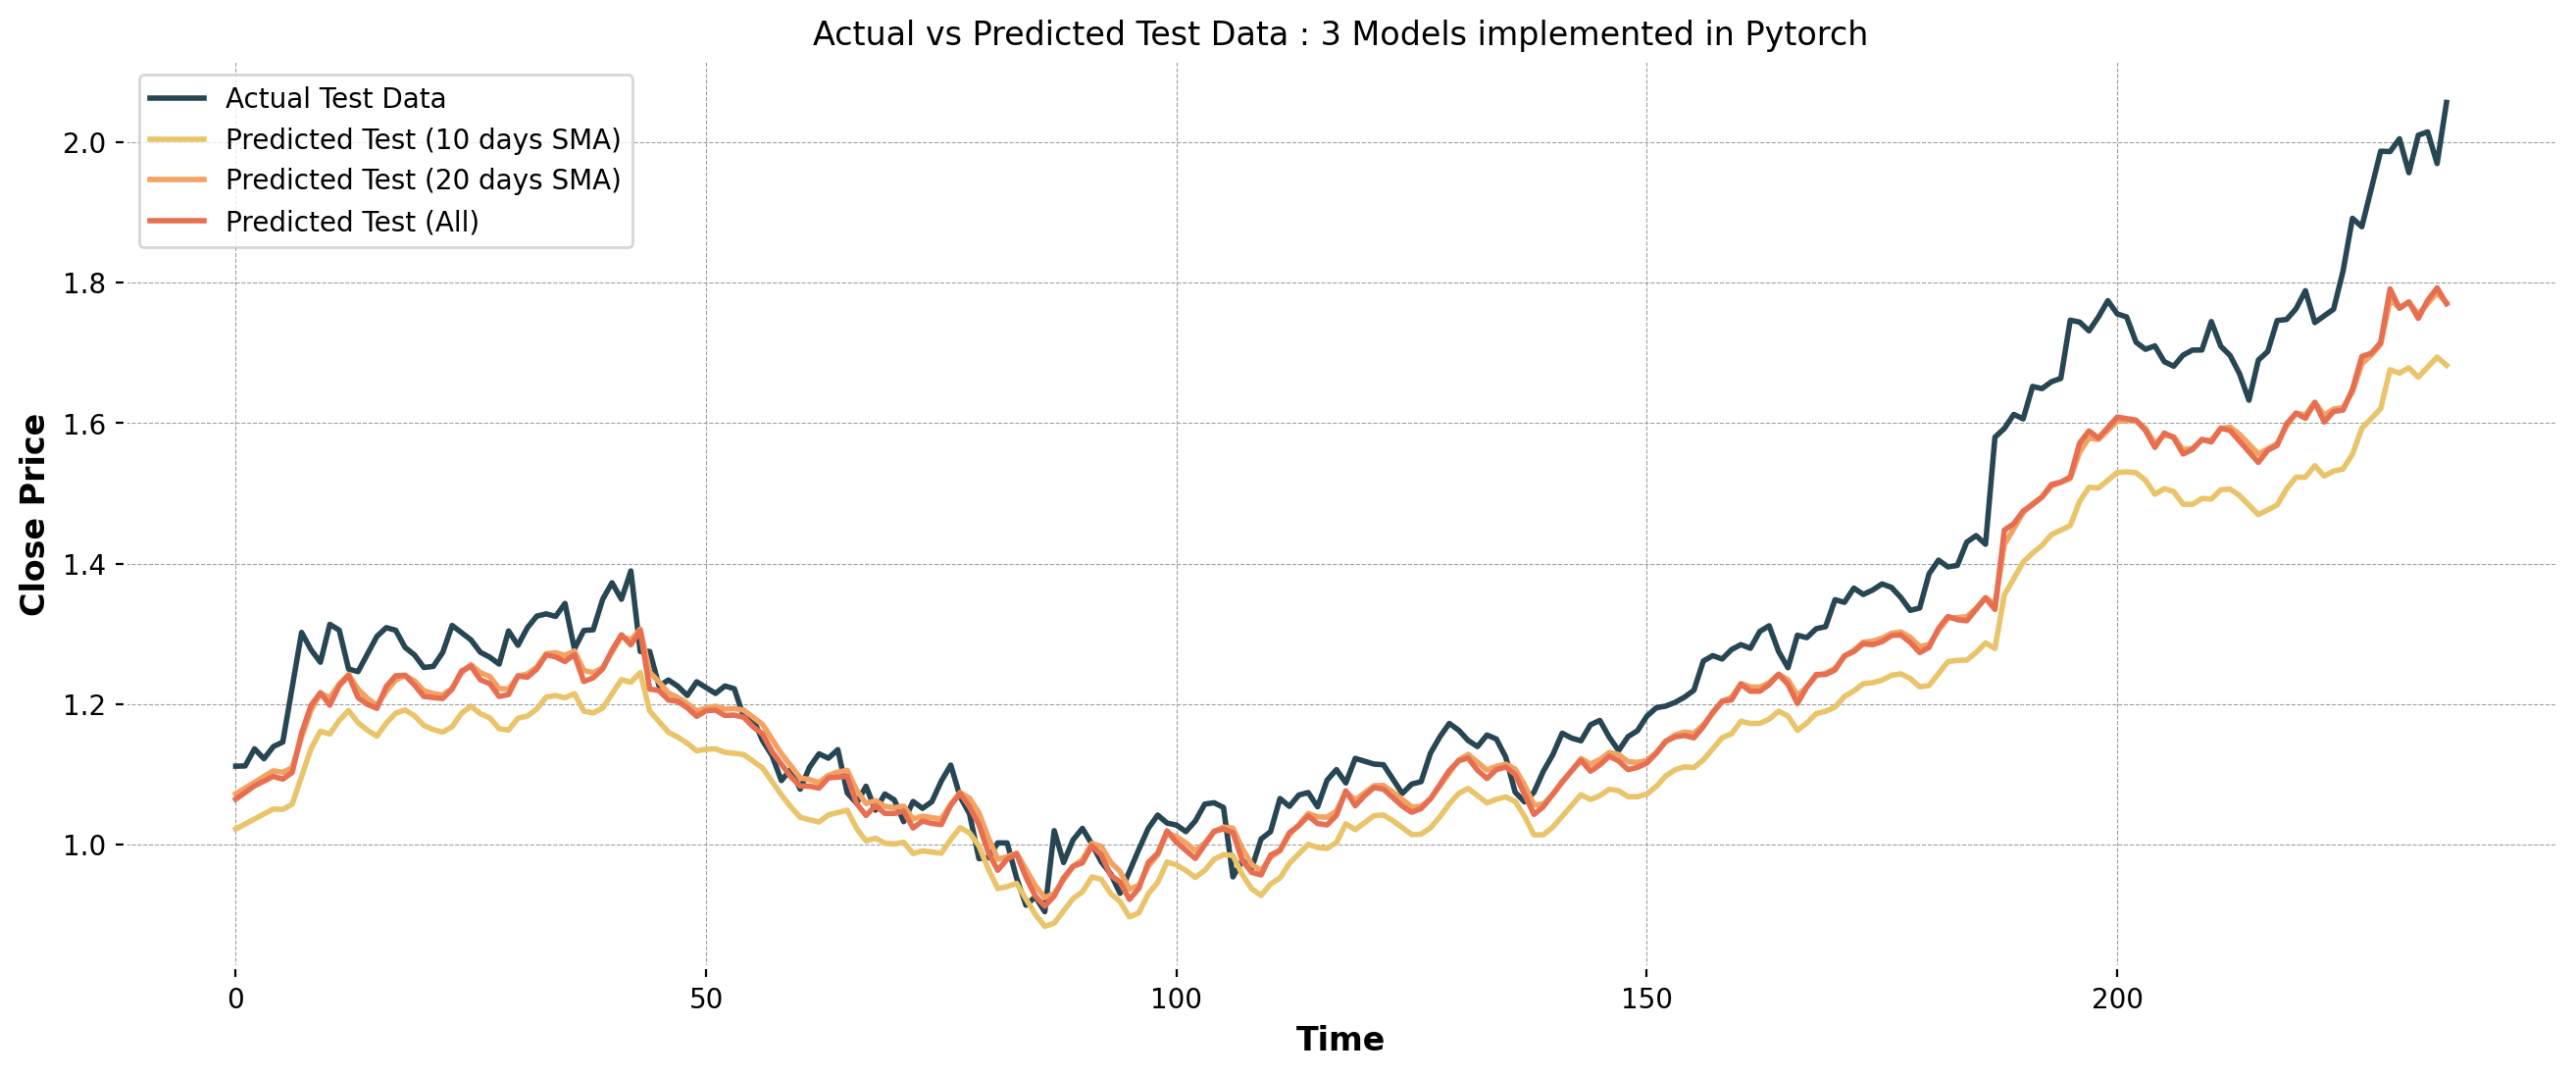

In [116]:
plt.figure(figsize=(16,6), dpi=200)

plt.plot(y_test_10d, label='Actual Test Data', color='#264653')
plt.plot(y_pred_10d, label='Predicted Test (10 days SMA)', color='#e9c46a')
plt.plot(y_pred_20d, label='Predicted Test (20 days SMA)', color='#f4a261')
plt.plot(y_pred_all, label='Predicted Test (All)', color='#e76f51')

plt.title('Actual vs Predicted Test Data : 3 Models implemented in Pytorch')
plt.xlabel('Time')
plt.ylabel('Close Price')

plt.legend()
plt.show()

In [117]:
# Get the last sequence of data as features for predicting the next 10 days
last_sequence = sequence_all[-1:, :, :]
last_sequence = torch.from_numpy(last_sequence).float()

# Generate predictions for the next 10 days
days_num = 10
with torch.no_grad():
    for i in range(days_num):
        pred = model_all(last_sequence)  # This should be of shape (1, 1, features)
        
        # Reshape pred to match the dimensions of last_sequence for concatenation
        pred = pred.unsqueeze(1)  # Add sequence length dimension (1, 1, features)
        
        last_sequence = torch.cat((last_sequence, pred), dim=1)  # Concatenate along sequence length
        last_sequence = last_sequence[:, 1:, :]  # Keep the last sequence length of data

# Convert predictions to numpy array
predicting_days = last_sequence.squeeze().numpy()

# Inverse transform the predicted values
predicting_days = scaler.inverse_transform(predicting_days)

# Extract relevant features (Open, High, Low, Close)
predicting_days = predicting_days[:days_num, :4]

# Create a DataFrame to store the predicted prices
df_pred = pd.DataFrame(
    data=predicting_days,
    columns=['Open', 'High', 'Low', 'Close']
)

# Get the last date in the main DataFrame
last_date_in_df = df['Date'].iloc[-1]

# Generate dates for the next 10 days after the last date in the main DataFrame
next_dates = pd.date_range(start=last_date_in_df + pd.Timedelta(days=1), periods=days_num)

# Create a DataFrame with the dates
df_dates = pd.DataFrame({'Date': next_dates})

# Concatenate the two DataFrames
df_combined = pd.concat([df_dates, df_pred], axis=1)

print(df_combined)

                       Date        Open        High         Low       Close
0 2025-10-23 00:00:00-04:00  285.265015  291.459991  283.540009  280.988007
1 2025-10-24 00:00:00-04:00  259.762695  259.735596  259.729309  259.734161
2 2025-10-25 00:00:00-04:00  238.173309  238.151520  238.148468  238.154251
3 2025-10-26 00:00:00-04:00  221.537552  221.520203  221.518723  221.523224
4 2025-10-27 00:00:00-04:00  208.318039  208.304092  208.303299  208.306671
5 2025-10-28 00:00:00-04:00  197.595551  197.584045  197.583435  197.586136
6 2025-10-29 00:00:00-04:00  188.728622  188.718826  188.718246  188.720612
7 2025-10-30 00:00:00-04:00  181.267563  181.258987  181.258362  181.260605
8 2025-10-31 00:00:00-04:00  174.894424  174.886780  174.886124  174.888306
9 2025-11-01 00:00:00-04:00  169.380157  169.373199  169.372498  169.374695
